In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patheffects as path_effects
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.patheffects as path_effects
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report,roc_auc_score,roc_curve, auc
import time
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.inspection import permutation_importance
import time
data = pd.read_csv('BankChurners.csv')#read csv file

In [2]:
data.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [3]:
cols = data.columns
num_cols = data._get_numeric_data().columns
categorical = list(set(cols) - set(num_cols))

In [4]:
float_columns = [x for x in data.columns if x in data.select_dtypes('number')]
float_columns

#Print Sknewness if skew value exceed 0.75
print("Numerical column skewness value > 0.75")
print("======================================")
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))
##print (skew_columns)
log_columns = skew_columns.loc[skew_columns > 0.75]
print (log_columns)

Numerical column skewness value > 0.75
Total_Ct_Chng_Q4_Q1     2.064031
Total_Trans_Amt         2.041003
Total_Amt_Chng_Q4_Q1    1.732063
Credit_Limit            1.666726
Avg_Open_To_Buy         1.661697
dtype: float64


In [5]:
data['Income_Category'] = data['Income_Category'].replace({
    'Unknown':0,
    'Less than $40K':1,
    '$40K - $60K':2,
    '$60K - $80K':3,
    '$80K - $120K':4,
    '$120K +':5
})

data['Gender'] = data['Gender'].replace({
    'M':0,
    'F':1,
})

data['Marital_Status'] = data['Marital_Status'].replace({
    'Unknown':0,
    'Single':1,
    'Married':2,
    'Divorced':3
})

data['Card_Category'] = data['Card_Category'].replace({
    'Blue':0,
    'Gold':1,
    'Platinum':2,
    'Silver':3
})

data['Education_Level'] = data['Education_Level'].replace({
    'Unknown':0,
    'Uneducated':1,
    'High School':2,
    'College':3,
    'Graduate':4,
    'Post-Graduate':5,
    'Doctorate':6
})


In [6]:
y = data[['Attrition_Flag']]
x = data.drop(columns=["Attrition_Flag"], axis = 1)
for col in log_columns.index.tolist():
    x[col] = np.log1p(x[col])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 0, stratify = y)

categorical_data = ['Gender','Education_Level','Marital_Status','Card_Category','Income_Category']

In [8]:
def prepare_targets(y_train, y_test):
    labelencoder = LabelEncoder()
    labelencoder.fit(y_train)
    y_train_enc = labelencoder.transform(y_train)
    y_test_enc = labelencoder.transform(y_test)
    return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train,y_test)

C:\Users\nigel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [9]:
y_train

array([1, 0, 1, ..., 1, 0, 1])

In [10]:
categorical_data = ['Gender','Education_Level','Marital_Status','Card_Category','Income_Category']


def prepare_inputs(x_train, x_test):
    mms = MinMaxScaler()
    x_train[num_cols] = mms.fit_transform(x_train[num_cols])
    x_test[num_cols] = mms.transform(x_test[num_cols])
    return x_train,x_test


    
#mix_maxscaler
x_train_process, x_test_process = prepare_inputs(x_train,x_test)

<ipython-input-10-39792bac9133>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_cols] = mms.fit_transform(x_train[num_cols])
C:\Users\nigel\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-10-39792bac9133>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [11]:
print(num_cols)

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


## Without One-Hot encode + Feature Selection Based on Feature Importance

In [12]:
def plotEvaluationMetrics(models,y,title):
    plt.rcParams['figure.figsize']=15,8 
    sns.set_style("darkgrid")
    ax = sns.barplot(x=models, y=y, palette = "rocket", saturation =1.5)
    plt.xlabel("Classifier Models", fontsize = 20 )
    plt.ylabel("% of Accuracy", fontsize = 20)
    plt.title(title, fontsize = 20)
    plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
    plt.yticks(fontsize = 13)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        xPlot, yPlot = p.get_xy() 
        ax.annotate(f'{height:.3%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

In [13]:
def roc_curve(fpr,tpr,roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def model_roc_curve(classifier,x_train,x_test):
    predProb = classifier.predict_proba(x_train)
    classifier.fit(x_train, y_train)
    predProb =  classifier.predict_proba(x_test)
    preds = predProb[:,1]
    fpr, tpr,threshold = metrics.roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    roc_curve(fpr,tpr,roc_auc)
    


In [14]:
drop = ["Months_on_book","Dependent_count","Avg_Utilization_Ratio","Credit_Limit","Contacts_Count_12_mon","Avg_Open_To_Buy"]
x_train_process = x_train_process.drop(columns =drop, axis = 1)
x_test_process = x_test_process.drop(columns =drop, axis = 1)

In [15]:
import joblib

def save_model(model, fileName):
    # Save Model to file in the current working directory
    joblib.dump(model, fileName)
    
def load_model(fileName,x_test,ytest):    
    # Load from file
    joblib_model = joblib.load(fileName)
    print(joblib_model,' ','\n')
    
    y_pred = joblib_model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    sns.heatmap(cm, xticklabels=['Predicted Churn', 'Predicted Not Churn'], yticklabels=['Actual_Churn', 'Actual_Not_Churn'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    print('Accuracy score: {0:0.3f}'.format(ac))
    print('Precision score: {0:0.3f}'.format(precision))
    print('Recall score: {0:0.3f}'.format(recall))
    print('F1 score: {0:0.3f}'.format(f1))
    print('Testing Accuracy: ',joblib_model.score(x_test, y_test))
    target_names = ['churn', 'not churn']
    print(classification_report(y_test, y_pred, target_names=target_names))

In [16]:
def model_training(classifier,x_train,x_test):
    start = time.time()
    classifier.fit(x_train, y_train)
    stop = time.time()
    trainingTime = stop - start
    print(f"Training time: {trainingTime}s")

    # Predicting the test set
    y_pred = classifier.predict(x_test)

    # Making the confusion matrix and calculating accuracy score
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    acscore.append(ac)
    acprecision.append(precision)
    acrecall.append(recall)
    acF1.append(f1)
    acTrainingTime.append(trainingTime)

    sns.heatmap(cm, xticklabels=['Predicted Churn', 'Predicted Not Churn'], yticklabels=['Actual_Churn', 'Actual_Not_Churn'],
                annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    print('Accuracy score: {0:0.3f}'.format(ac))
    print('Precision score: {0:0.3f}'.format(precision))
    print('Recall score: {0:0.3f}'.format(recall))
    print('F1 score: {0:0.3f}'.format(f1))
    print('Training Accuracy: ',classifier.score(x_train, y_train))
    print('Testing Accuracy: ',classifier.score(x_test, y_test))
    target_names = ['churn', 'not churn']
    print(classification_report(y_test, y_pred, target_names=target_names))
    return classifier.fit(x_train, y_train)

In [17]:
def trainingTimePlot(models,y,title):
    plt.rcParams['figure.figsize']=15,8 
    sns.set_style("darkgrid")
    ax = sns.barplot(x=models, y=acTrainingTime, palette = "rocket", saturation =1.5)
    plt.xlabel("Classifier Models", fontsize = 20 )
    plt.ylabel("Fitting / Training Time", fontsize = 20)
    plt.title("Fitting / Training Time of different Classifier Models", fontsize = 20)
    plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
    plt.yticks(fontsize = 13)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        xPlot, yPlot = p.get_xy() 
        ax.annotate(f'{height:.2}''s', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

## Random Forest with Feature Selection

Training time: 0.671140193939209s
Accuracy score: 0.966
Precision score: 0.972
Recall score: 0.988
F1 score: 0.980
Training Accuracy:  1.0
Testing Accuracy:  0.9657782165185916
              precision    recall  f1-score   support

       churn       0.93      0.85      0.89       488
   not churn       0.97      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.92      0.93      3039
weighted avg       0.97      0.97      0.97      3039



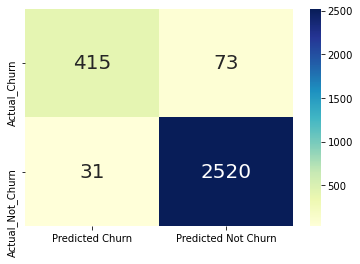

In [18]:
acscore = []
acprecision = []
acrecall = []
acF1 = []
acTrainingTime = []


RFC = RandomForestClassifier(random_state=0)
model = model_training(RFC,x_train_process,x_test_process)


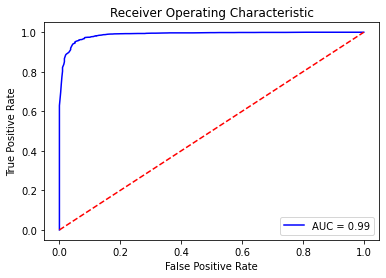

In [19]:
model_roc_curve(RFC,x_train_process,x_test_process)

## DTC

Training time: 0.029987335205078125s
Accuracy score: 0.938
Precision score: 0.960
Recall score: 0.967
F1 score: 0.963
Training Accuracy:  1.0
Testing Accuracy:  0.9384666008555446
              precision    recall  f1-score   support

       churn       0.82      0.79      0.81       488
   not churn       0.96      0.97      0.96      2551

    accuracy                           0.94      3039
   macro avg       0.89      0.88      0.88      3039
weighted avg       0.94      0.94      0.94      3039



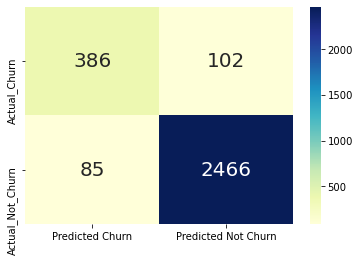

In [20]:
DTC = DecisionTreeClassifier(random_state=0)

model =  model_training(DTC,x_train_process,x_test_process)


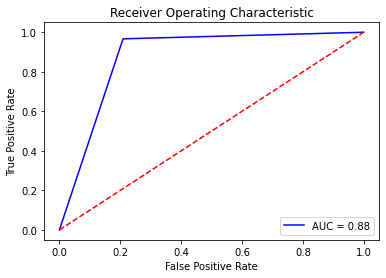

In [21]:
model_roc_curve(DTC,x_train_process,x_test_process)

## XG Boost

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 0.4966697692871094s
Accuracy score: 0.971
Precision score: 0.978
Recall score: 0.987
F1 score: 0.983
Training Accuracy:  1.0
Testing Accuracy:  0.970714050674564
              precision    recall  f1-score   support

       churn       0.93      0.89      0.91       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

[22:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bi

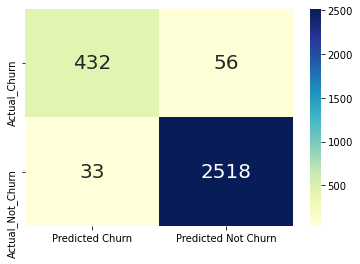

In [22]:
m_xgb = xgb.XGBClassifier(random_state=0)
xgb1 =  model_training(m_xgb,x_train_process,x_test_process)

[22:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


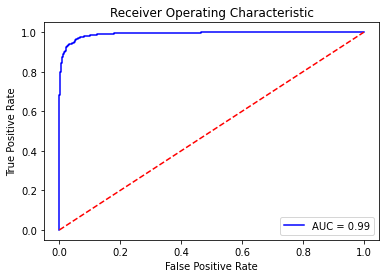

In [23]:
model_roc_curve(m_xgb,x_train_process,x_test_process)

In [24]:
file_name = "xgb1.pkl"
save_model(xgb1,file_name)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)   

Accuracy score: 0.971
Precision score: 0.978
Recall score: 0.987
F1 score: 0.983
Testing Accuracy:  0.970714050674564
              precision    recall  f1-score   support

       churn       0.93      0.89      0.91       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97 

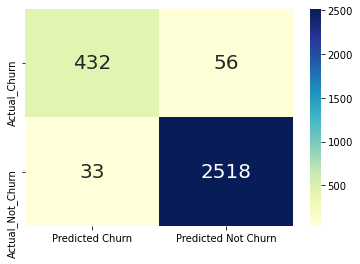

In [25]:
file_name = "xgb1.pkl"
load_model(file_name,x_test_process,y_test)

## Ensemble Model XGBoost + Random Forest

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 1.2541539669036865s
Accuracy score: 0.971
Precision score: 0.982
Recall score: 0.983
F1 score: 0.983
Training Accuracy:  1.0
Testing Accuracy:  0.970714050674564
              precision    recall  f1-score   support

       churn       0.91      0.91      0.91       488
   not churn       0.98      0.98      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.95      0.95      3039
weighted avg       0.97      0.97      0.97      3039

[22:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bi

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


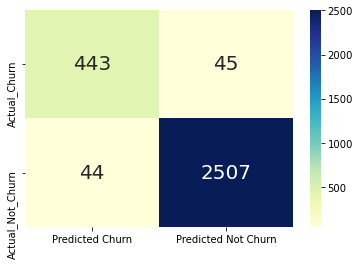

In [26]:
from sklearn.ensemble import VotingClassifier
estimators = [('XG', m_xgb),('RFC', RFC)]
VC = VotingClassifier(estimators, voting='hard')

voting1 = model_training(VC,x_train_process,x_test_process)

In [27]:
file_name = "votingModel1.pkl"
save_model(voting1,file_name)

VotingClassifier(estimators=[('XG',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
               

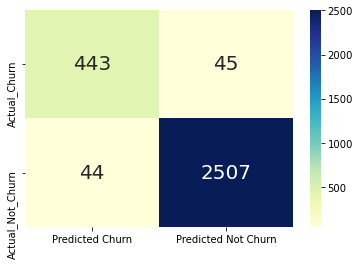

In [28]:
file_name = "votingModel1.pkl"
load_model(file_name,x_test_process,y_test)

In [29]:
x_process_concat = pd.concat([x_train_process,x_test_process])
y_concat =  np.concatenate((y_train, y_test), axis=None)

## CV Score

In [30]:
CVMean = []
CVSD = []
models = ["RFC","DTC","XGB","RF+XGB"]
tupleModel = [RFC,DTC,m_xgb,VC]
a = 0
for model in models:
    model = cross_val_score(tupleModel[a],x_process_concat, y_concat,cv=5,scoring='accuracy')
    print(models[a],":",model)
    CVMean.append(model.mean())
    CVSD.append(model.std())
    a+=1


RFC : [0.96594274 0.95755183 0.96345679 0.96296296 0.9654321 ]
DTC : [0.94471866 0.93780849 0.9437037  0.93777778 0.93481481]
[22:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RF+XGB : [0.9733465  0.96199408 0.96641975 0.9708642  0.96888889]


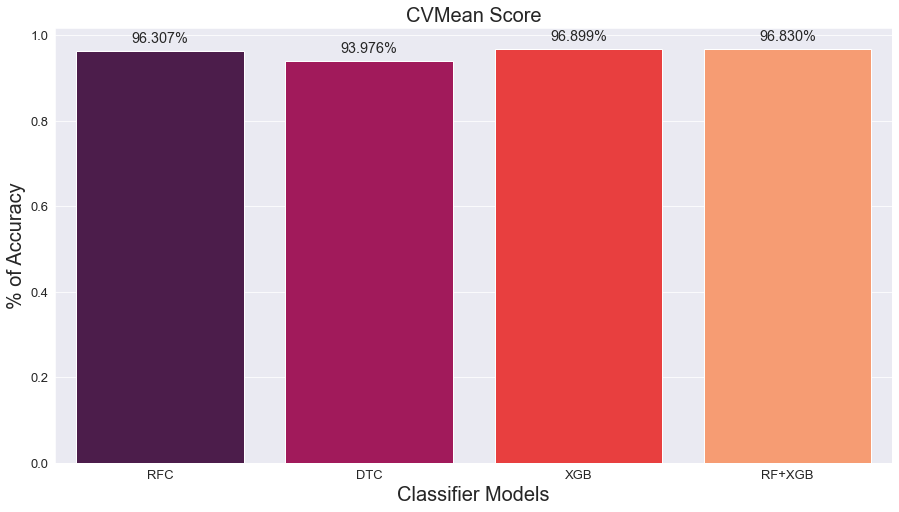

In [31]:
plotEvaluationMetrics(models,CVMean,"CVMean Score")

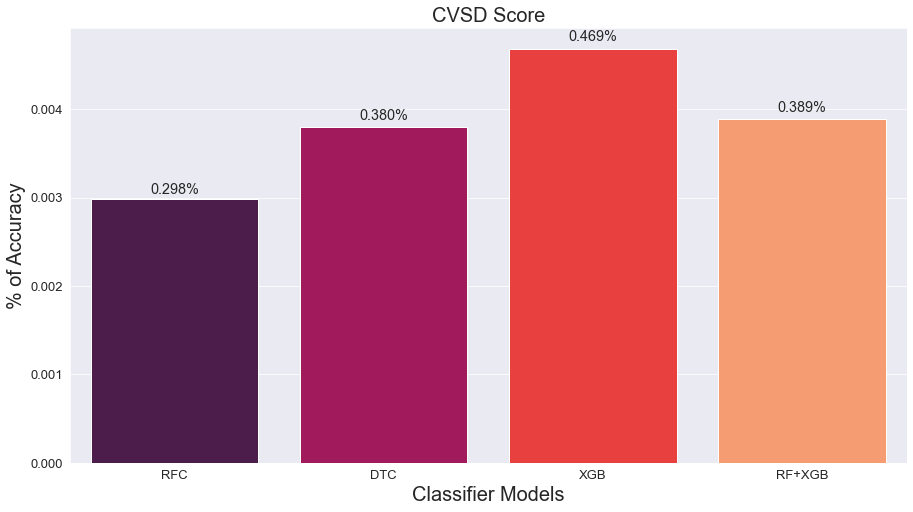

In [32]:
plotEvaluationMetrics(models,CVSD,"CVSD Score")

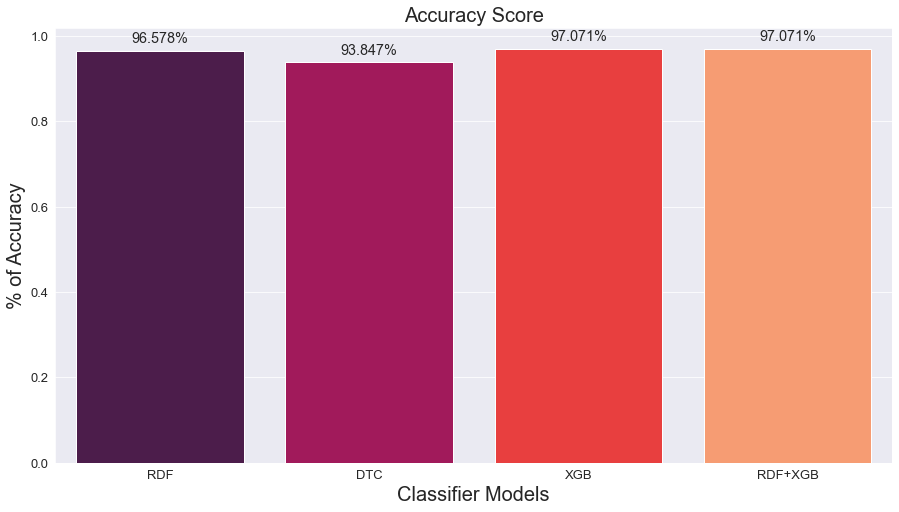

In [33]:
models = ['RDF','DTC','XGB','RDF+XGB']
# Visualising the accuracy score of each classification model
plotEvaluationMetrics(models,acscore,"Accuracy Score")

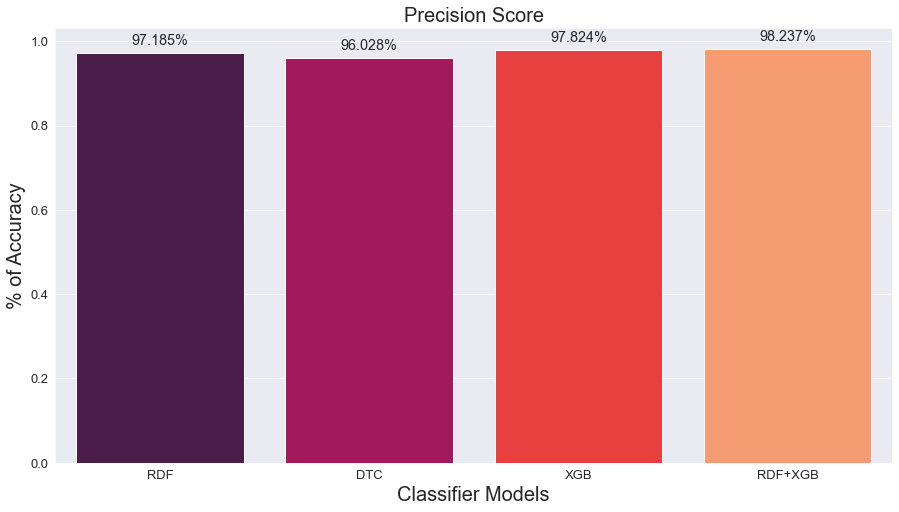

In [34]:
plotEvaluationMetrics(models,acprecision,"Precision Score")

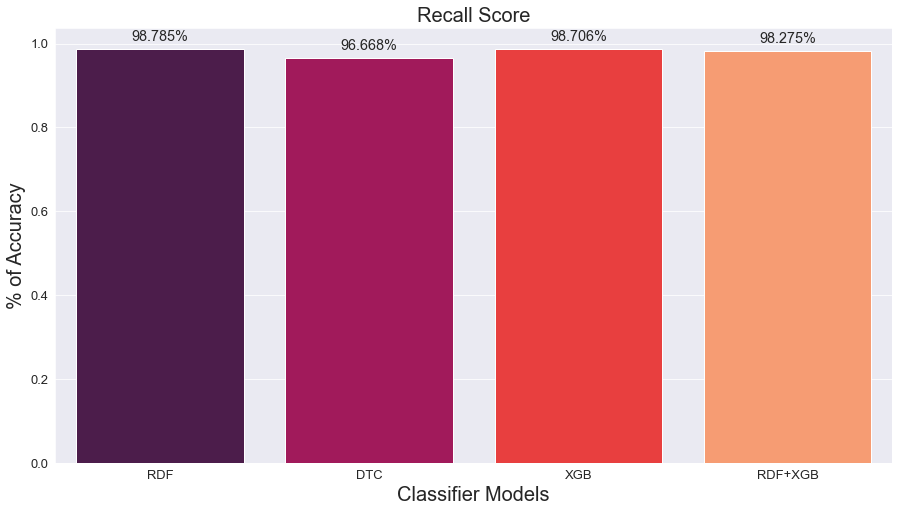

In [35]:
plotEvaluationMetrics(models,acrecall,"Recall Score")

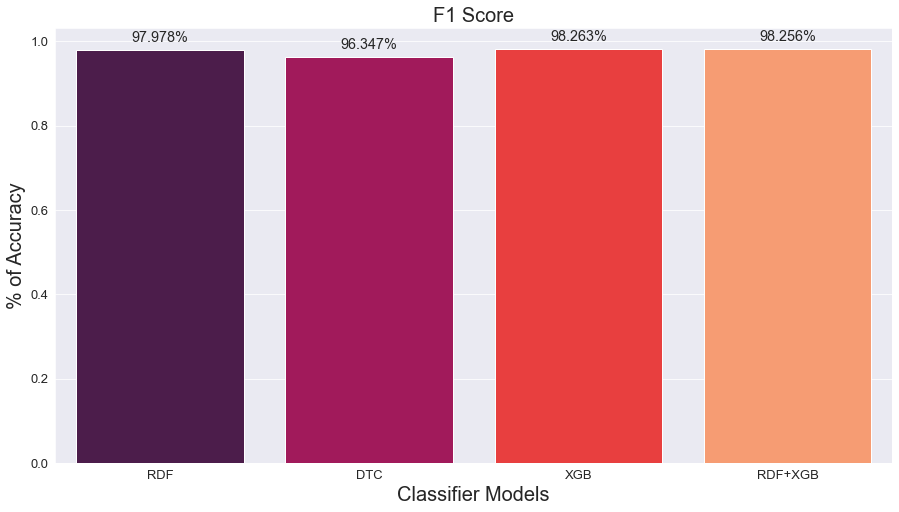

In [36]:
plotEvaluationMetrics(models,acF1,"F1 Score")

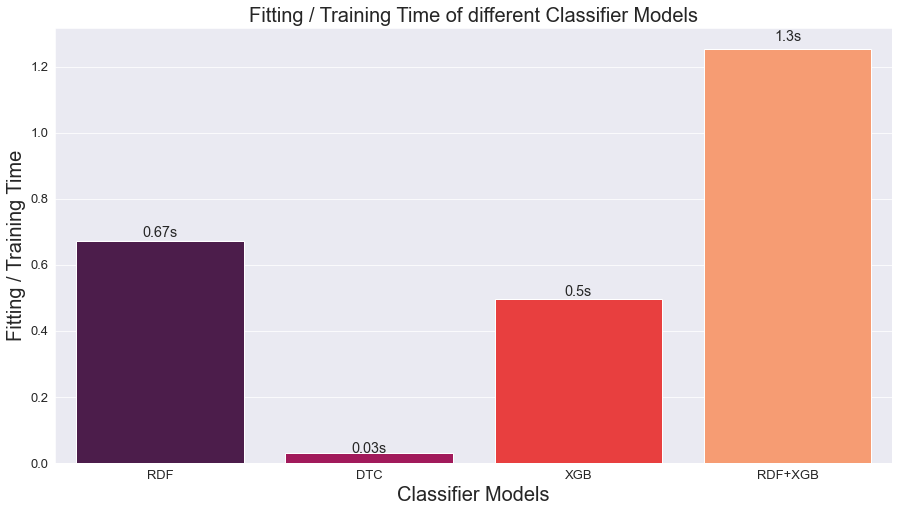

In [37]:
trainingTimePlot(models,acTrainingTime,"Training Time")

## One Hot Enconded + Feature Selection Based on Feature Importance

In [38]:
x_ohc = data.drop(columns=["Attrition_Flag"], axis = 1)


from sklearn.preprocessing import OneHotEncoder

for col in log_columns.index.tolist():
    x_ohc[col] = np.log1p(x[col])

categorical_data = ['Gender','Income_Category','Education_Level','Marital_Status','Card_Category']
x_ohc[categorical_data]

def oneHot_targets(X_categorical):
    ohc = OneHotEncoder()
    le = LabelEncoder()
    data_ohc = X_categorical.copy()
    for col in X_categorical.columns:
        if col in (x_ohc[categorical_data]):
            dat = le.fit_transform(X_categorical[col]).astype(np.int)
            data_ohc = data_ohc.drop(col, axis=1)
            new_dat = ohc.fit_transform(dat.reshape(-1,1))
            n_cols = new_dat.shape[1]
            col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
            # Create the new dataframe
            new_df = pd.DataFrame(new_dat.toarray(), 
                                  index=data_ohc.index, 
                                  columns=col_names)

        # Append the new data to the dataframe
            data_ohc = pd.concat([data_ohc, new_df], axis=1)

    return data_ohc
 
x_ohc = oneHot_targets(x_ohc)

x_train_ohc, x_test_ohc, y_train, y_test = train_test_split(x_ohc, y, test_size = 0.3,random_state = 0, stratify = y)
x_train_process_ohc, x_test_process_ohc = prepare_inputs(x_train_ohc,x_test_ohc)
y_train, y_test = prepare_targets(y_train,y_test)

<ipython-input-10-39792bac9133>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_cols] = mms.fit_transform(x_train[num_cols])
C:\Users\nigel\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-10-39792bac9133>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [39]:
drop = ["Months_on_book","Dependent_count","Avg_Utilization_Ratio","Credit_Limit","Contacts_Count_12_mon","Avg_Open_To_Buy"]
x_train_process_ohc = x_train_process_ohc.drop(columns =drop, axis = 1)
x_test_process_ohc = x_test_process_ohc.drop(columns =drop, axis = 1)

## RFC

Training time: 0.6950781345367432s
Accuracy score: 0.960
Precision score: 0.964
Recall score: 0.989
F1 score: 0.976
Training Accuracy:  1.0
Testing Accuracy:  0.9598552155314248
              precision    recall  f1-score   support

       churn       0.93      0.81      0.87       488
   not churn       0.96      0.99      0.98      2551

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039



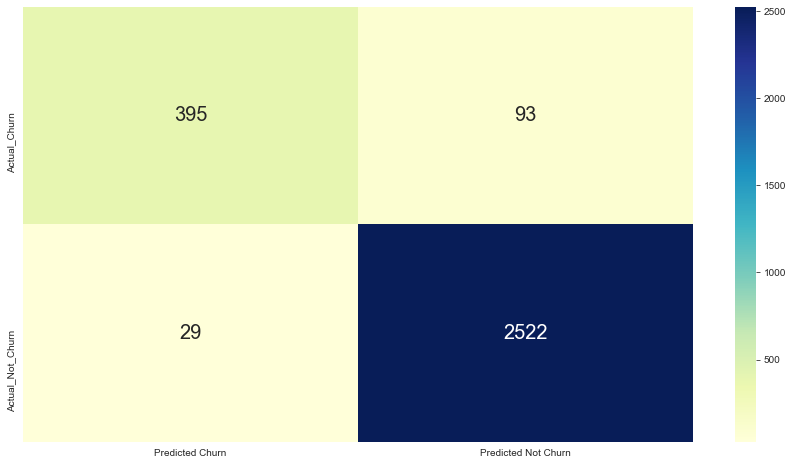

In [40]:
acscore = []
acprecision = []
acrecall = []
acF1 = []
acTrainingTime = []

model = model_training(RFC,x_train_process_ohc,x_test_process_ohc)

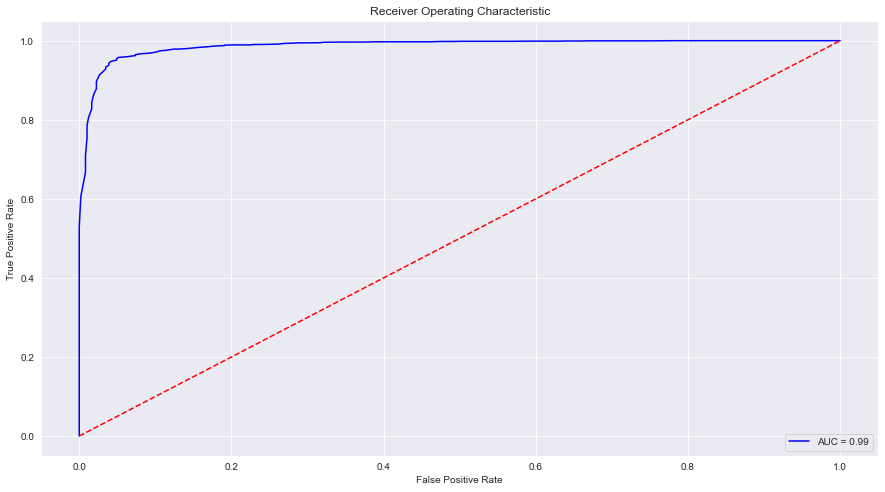

In [41]:
model_roc_curve(RFC,x_train_process_ohc,x_test_process_ohc)

## DTC

Training time: 0.04193711280822754s
Accuracy score: 0.939
Precision score: 0.962
Recall score: 0.966
F1 score: 0.964
Training Accuracy:  1.0
Testing Accuracy:  0.939453767686739
              precision    recall  f1-score   support

       churn       0.82      0.80      0.81       488
   not churn       0.96      0.97      0.96      2551

    accuracy                           0.94      3039
   macro avg       0.89      0.88      0.89      3039
weighted avg       0.94      0.94      0.94      3039



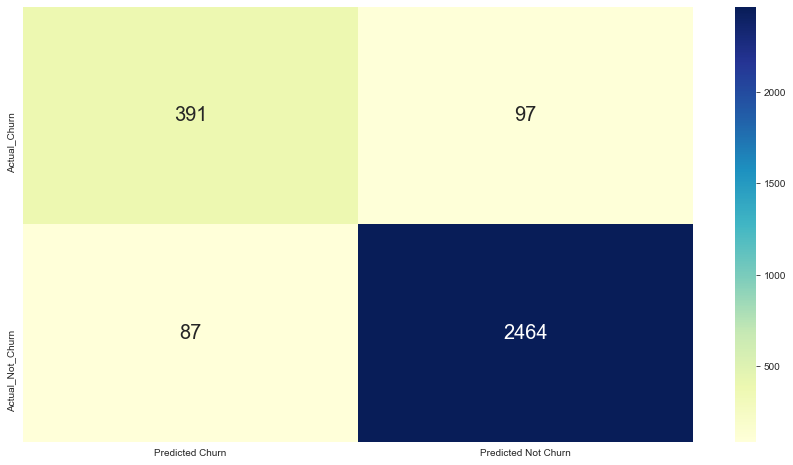

In [42]:
model = model_training(DTC,x_train_process_ohc,x_test_process_ohc)

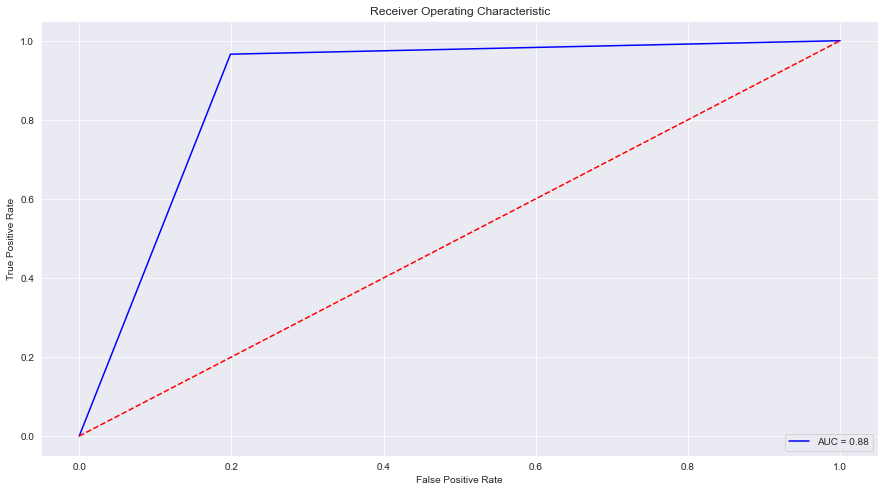

In [43]:
model_roc_curve(DTC,x_train_process_ohc,x_test_process_ohc)

## XG Boost

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 0.521775484085083s
Accuracy score: 0.971
Precision score: 0.978
Recall score: 0.987
F1 score: 0.983
Training Accuracy:  1.0
Testing Accuracy:  0.970714050674564
              precision    recall  f1-score   support

       churn       0.93      0.88      0.91       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

[22:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bin

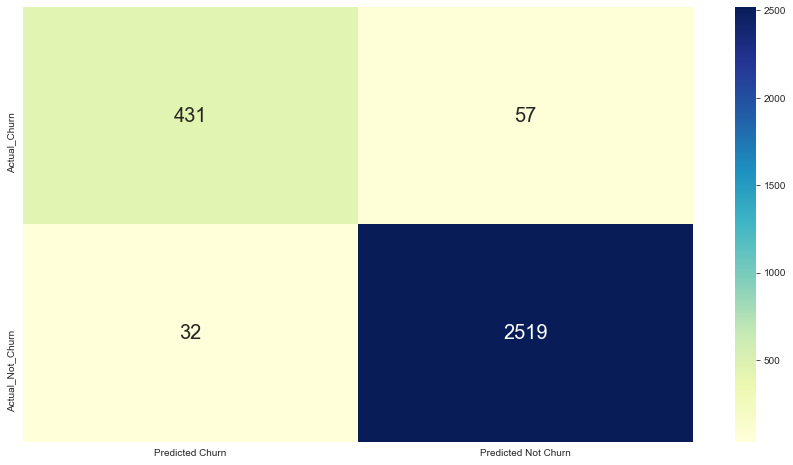

In [44]:
xgb2 = model_training(m_xgb,x_train_process_ohc,x_test_process_ohc)

In [45]:
file_name = "xgb2.pkl"
save_model(xgb2,file_name)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)   

Accuracy score: 0.971
Precision score: 0.978
Recall score: 0.987
F1 score: 0.983
Testing Accuracy:  0.970714050674564
              precision    recall  f1-score   support

       churn       0.93      0.88      0.91       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97 

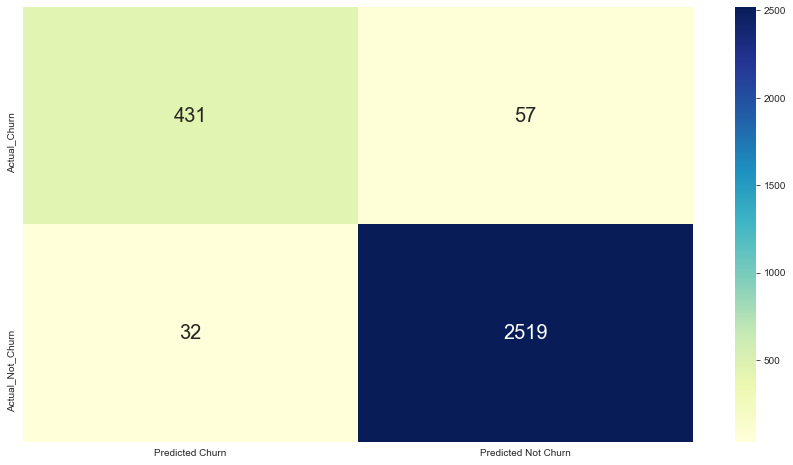

In [46]:
file_name = "xgb2.pkl"
load_model(file_name,x_test_process_ohc,y_test)

[22:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


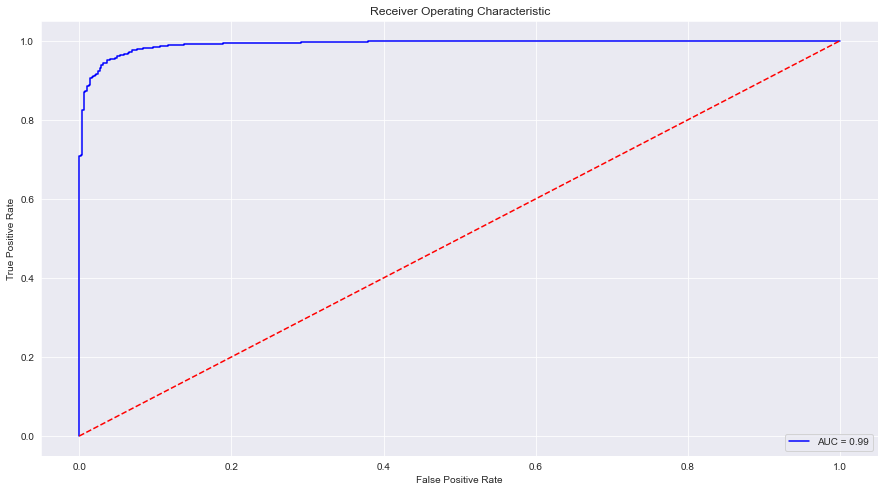

In [47]:
model_roc_curve(m_xgb,x_train_process_ohc,x_test_process_ohc)

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 1.3009963035583496s
Accuracy score: 0.970
Precision score: 0.982
Recall score: 0.983
F1 score: 0.982
Training Accuracy:  1.0
Testing Accuracy:  0.9700559394537677
              precision    recall  f1-score   support

       churn       0.91      0.90      0.91       488
   not churn       0.98      0.98      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

[22:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'b

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


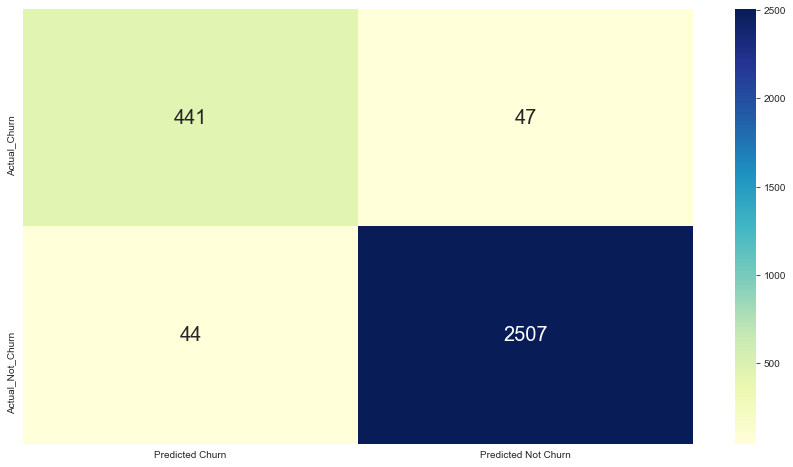

In [48]:
estimators = [('XG', m_xgb),('RFC', RFC)]
VC = VotingClassifier(estimators, voting='hard')
voting2 = model_training(VC,x_train_process_ohc,x_test_process_ohc)

In [49]:
file_name = "votingModel2.pkl"
save_model(voting2,file_name)

VotingClassifier(estimators=[('XG',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
               

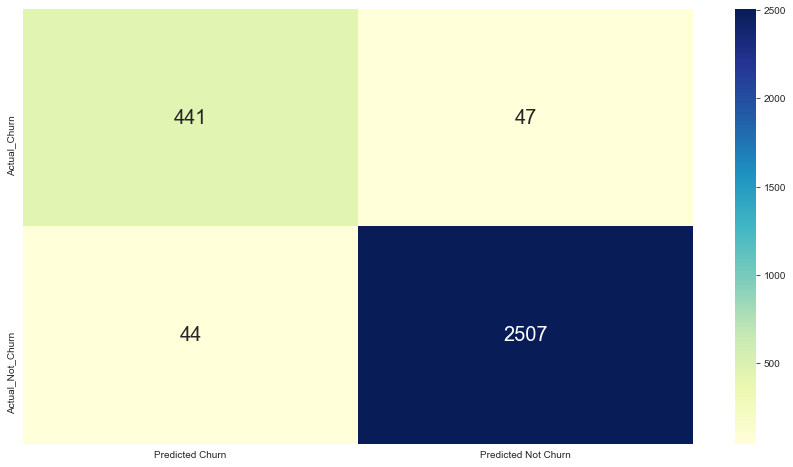

In [50]:
file_name = "votingModel2.pkl"
load_model(file_name,x_test_process_ohc,y_test)

In [51]:
x_process_ohc_concat = pd.concat([x_train_process_ohc,x_test_process_ohc])

## CV Score

In [52]:
CVMean = []
CVSD = []
models = ["RFC","DTC","XGB","RF+XGB"]
tupleModel = [RFC,DTC,m_xgb,VC]
a = 0
for model in models:
    model = cross_val_score(tupleModel[a],x_process_ohc_concat, y_concat,cv=5,scoring='accuracy')
    print(models[a],":",model)
    CVMean.append(model.mean())
    CVSD.append(model.std())
    a+=1

RFC : [0.95508391 0.95113524 0.95703704 0.9545679  0.96098765]
DTC : [0.94076999 0.93731491 0.94123457 0.93185185 0.93777778]
[22:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RF+XGB : [0.97384008 0.96248766 0.96641975 0.9708642  0.96839506]


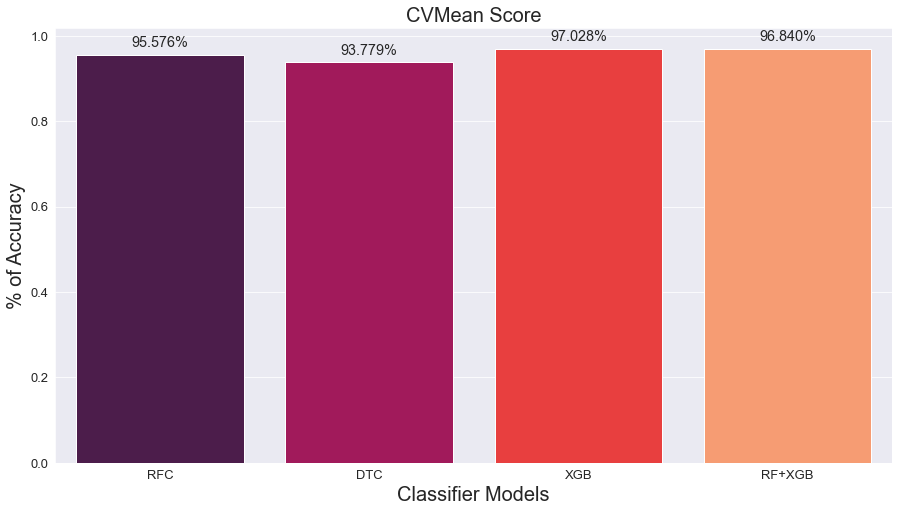

In [53]:
plotEvaluationMetrics(models,CVMean,"CVMean Score")

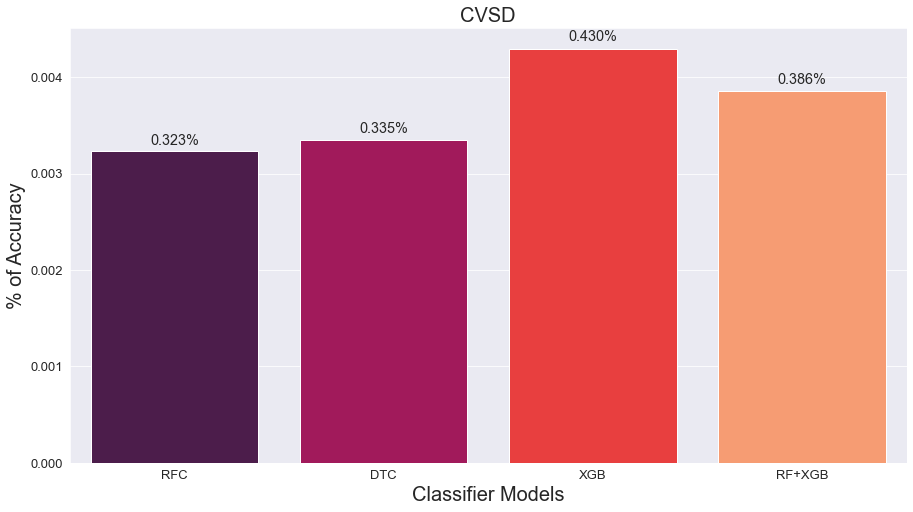

In [54]:
plotEvaluationMetrics(models,CVSD,"CVSD")

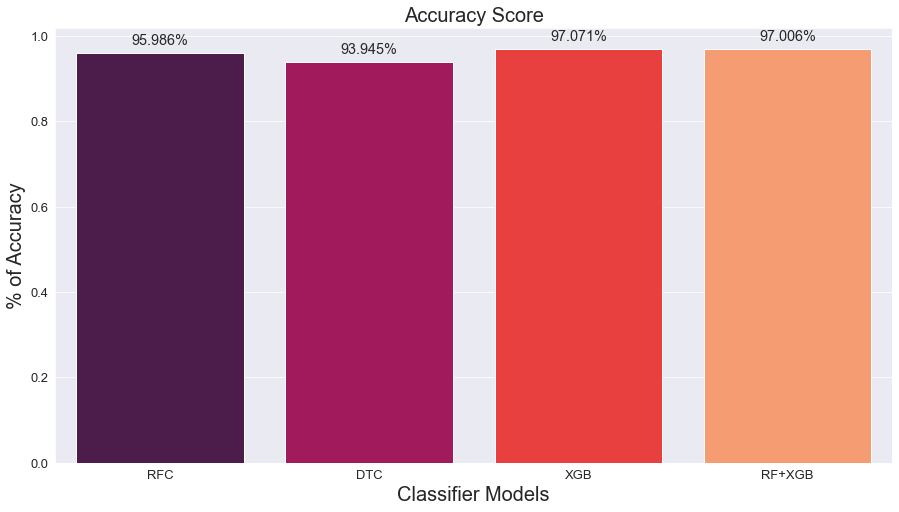

In [55]:
plotEvaluationMetrics(models,acscore,"Accuracy Score")

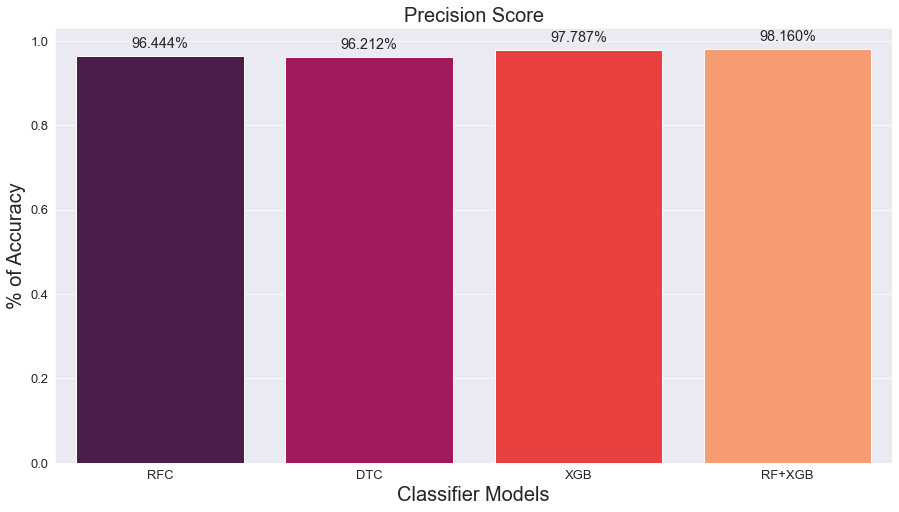

In [56]:
plotEvaluationMetrics(models,acprecision,"Precision Score")

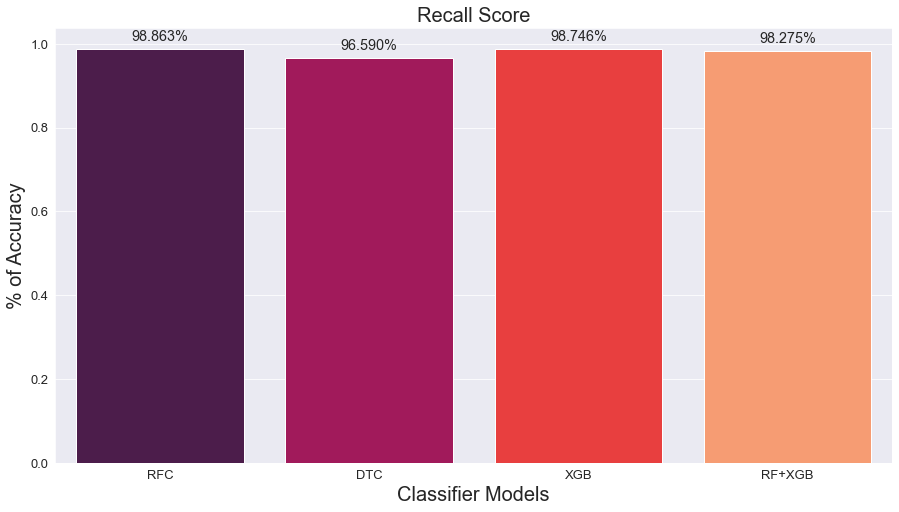

In [57]:
plotEvaluationMetrics(models,acrecall,"Recall Score")

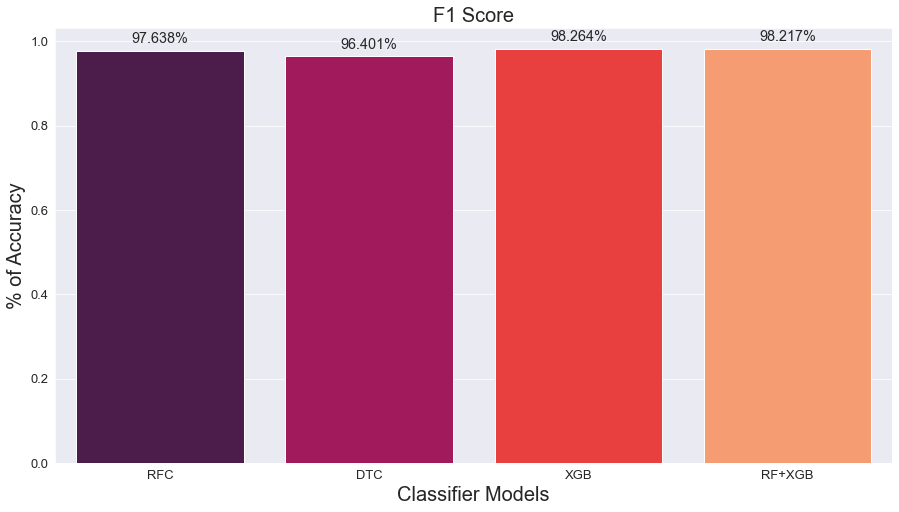

In [58]:
plotEvaluationMetrics(models,acF1,"F1 Score")

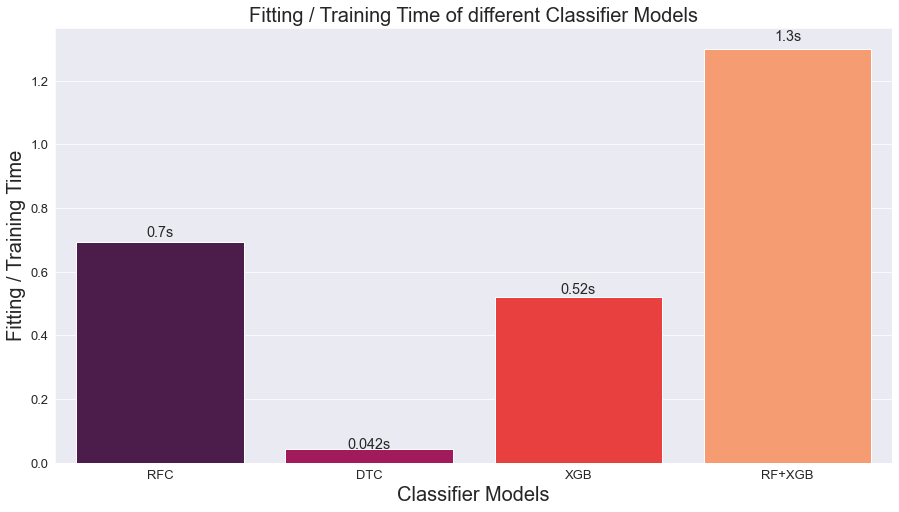

In [59]:
trainingTimePlot(models,acTrainingTime,"Training Time")

In [60]:
#grid search 

from sklearn.model_selection import GridSearchCV

model_params = {
    'DecisionTree':{
        'model':DecisionTreeClassifier(random_state = 0),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[1,5,10,15,20,25],
            'max_features':['auto', 'sqrt', 'log2']
        }
    },
    'RandomForest':{
        'model':RandomForestClassifier(random_state = 0),
        'params':{
            'criterion':['gini','entropy'],
            'n_estimators':[10,50,100,150,200],
            'max_depth':[1,5,10,15,20,25],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    'XGBoost':{
        'model':xgb.XGBClassifier(random_state = 0),
        'params':{
            'min_child_weight': [1, 5, 10],
            'gamma': [0.1,0.5, 1, 1.5, 2],
            'subsample': [0.5, 1.0, 1.5,2.0],
            'colsample_bytree': [0.5, 1.0, 1.5,2.0],
            'max_depth': [3, 4, 5]
        }
    }
}

x_process_concat = pd.concat([x_train_process,x_test_process])
y_concat =  np.concatenate((y_train, y_test), axis=None)
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5,return_train_score=False)
    clf.fit(x_process_concat, y_concat)
    scores.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_,
        'refit_time':clf.refit_time_
         
    })
        
GridSearchdf = pd.DataFrame(scores, columns=['model','best_score','best_params','refit_time'])
GridSearchdf

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\nigel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nigel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nigel\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\nigel\anaconda3\lib\site-packages\xgboost\training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "C:\Users\nigel\anaconda3\lib\site-packages\xgboost\training.py", line 102, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\nigel\anaconda3\lib\site-packages\xgbo

[22:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:39:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:40:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:40:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:40:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:41:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:42:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:42:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:43:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:44:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:44:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\nigel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nigel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nigel\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\nigel\anaconda3\lib\site-packages\xgboost\training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "C:\Users\nigel\anaconda3\lib\site-packages\xgboost\training.py", line 102, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\nigel\anaconda3\lib\site-packages\xgbo

[22:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,best_score,best_params,refit_time
0,DecisionTree,0.931964,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.016956
1,RandomForest,0.963958,"{'criterion': 'entropy', 'max_depth': 25, 'max...",1.817874
2,XGBoost,0.972351,"{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_d...",0.438991


In [61]:
print(GridSearchdf)

          model  best_score  \
0  DecisionTree    0.931964   
1  RandomForest    0.963958   
2       XGBoost    0.972351   

                                         best_params  refit_time  
0  {'criterion': 'entropy', 'max_depth': 15, 'max...    0.016956  
1  {'criterion': 'entropy', 'max_depth': 25, 'max...    1.817874  
2  {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_d...    0.438991  


## Grid Search Train with One Hot Encoded

In [62]:
for best_params in GridSearchdf['best_params']:
    print(best_params)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto'}
{'criterion': 'entropy', 'max_depth': 25, 'max_features': 'auto', 'n_estimators': 150}
{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}


Training time: 1.660308837890625s
Accuracy score: 0.961
Precision score: 0.964
Recall score: 0.991
F1 score: 0.977
Training Accuracy:  1.0
Testing Accuracy:  0.9608423823626193
              precision    recall  f1-score   support

       churn       0.94      0.81      0.87       488
   not churn       0.96      0.99      0.98      2551

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039



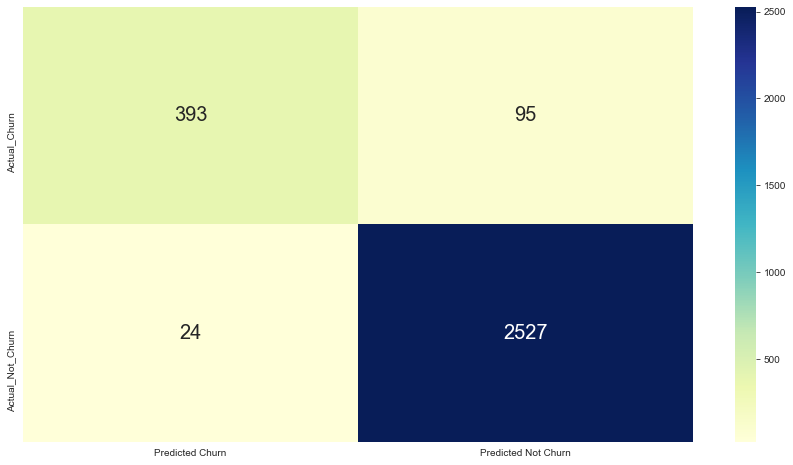

In [63]:
acscore = []
acprecision = []
acrecall = []
acF1 = []
acTrainingTime = []

RFC = RandomForestClassifier(random_state = 0,criterion = 'entropy', max_depth = 25, max_features = 'auto', n_estimators = 150)
model = model_training(RFC,x_train_process_ohc,x_test_process_ohc)

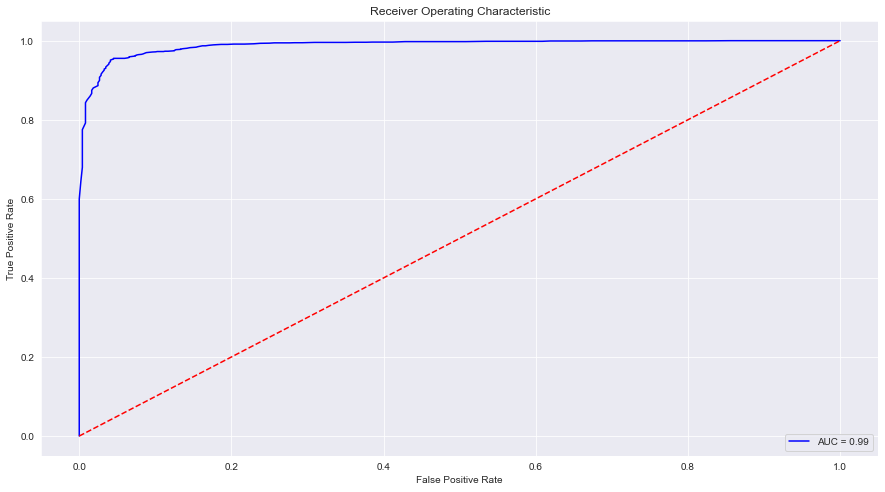

In [64]:
model_roc_curve(RFC,x_train_process_ohc,x_test_process_ohc)

Training time: 0.0169525146484375s
Accuracy score: 0.923
Precision score: 0.953
Recall score: 0.955
F1 score: 0.954
Training Accuracy:  0.9911117381489842
Testing Accuracy:  0.922671931556433
              precision    recall  f1-score   support

       churn       0.76      0.75      0.76       488
   not churn       0.95      0.95      0.95      2551

    accuracy                           0.92      3039
   macro avg       0.86      0.85      0.86      3039
weighted avg       0.92      0.92      0.92      3039



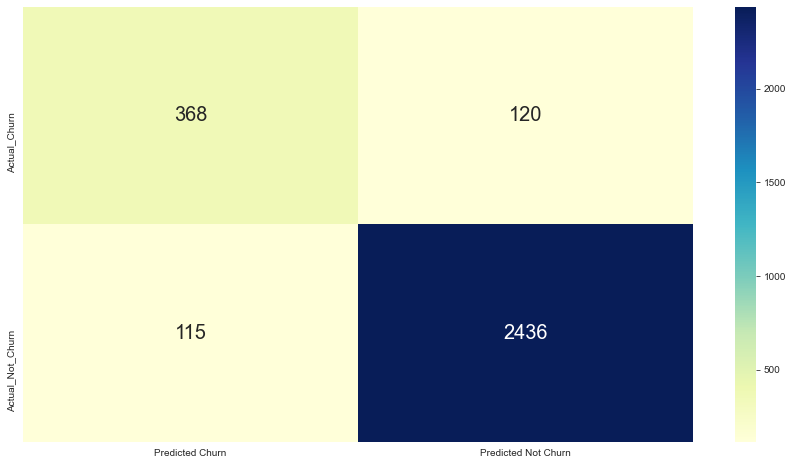

In [65]:
DTC = DecisionTreeClassifier(random_state=0,criterion = 'entropy', max_depth = 15, max_features = 'auto')
model = model_training(DTC,x_train_process_ohc,x_test_process_ohc)

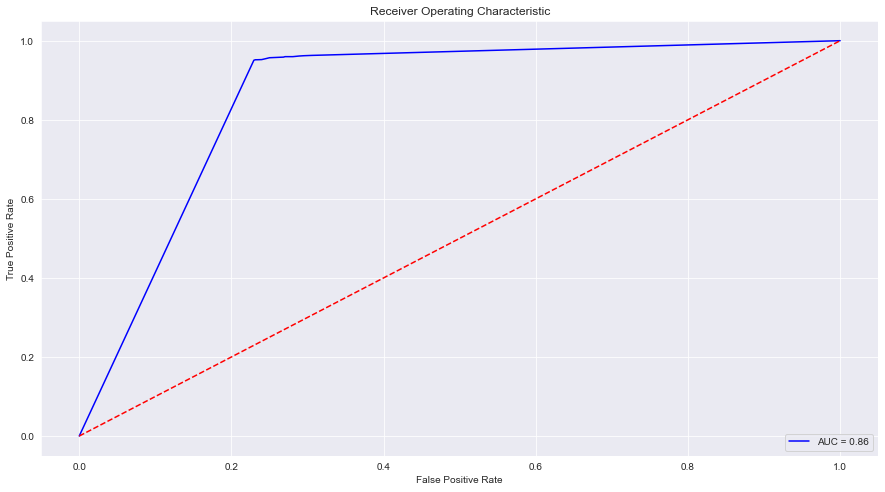

In [66]:
model_roc_curve(DTC,x_train_process_ohc,x_test_process_ohc)

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 0.4969174861907959s
Accuracy score: 0.967
Precision score: 0.975
Recall score: 0.986
F1 score: 0.981
Training Accuracy:  0.9974604966139955
Testing Accuracy:  0.9670944389601843
              precision    recall  f1-score   support

       churn       0.92      0.87      0.89       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039

[22:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with t

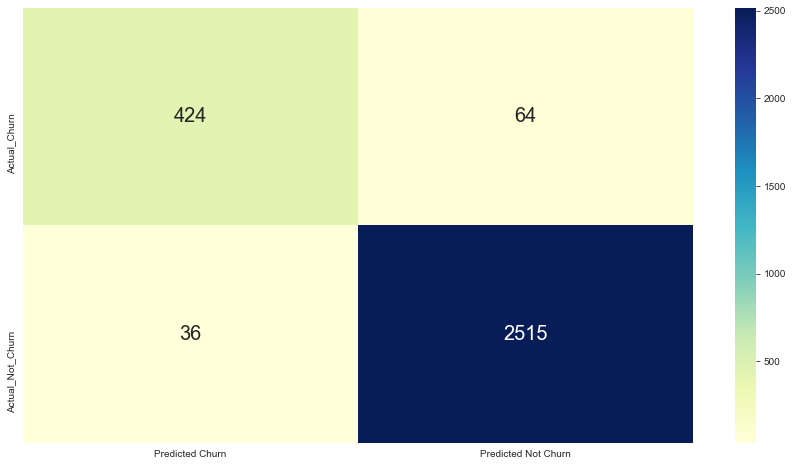

In [67]:
m_xgb = xgb.XGBClassifier(random_state = 0,colsample_bytree = 0.8, gamma = 1, max_depth = 5, min_child_weight= 1, subsample= 1.0)
xgb_model = model_training(m_xgb,x_train_process_ohc,x_test_process_ohc)

[22:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


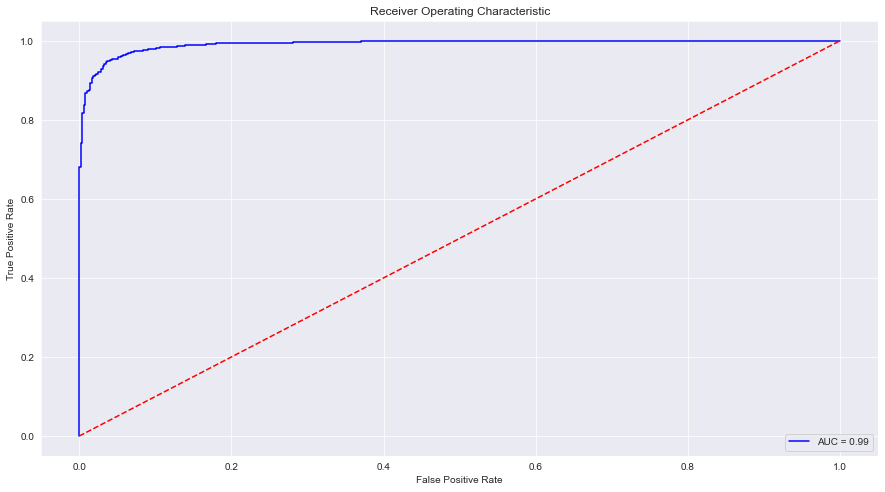

In [68]:
model_roc_curve(m_xgb,x_train_process_ohc,x_test_process_ohc)

In [69]:
file_name = "xgbModel2.pkl"
save_model(xgb_model,file_name)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)   

Accuracy score: 0.967
Precision score: 0.975
Recall score: 0.986
F1 score: 0.981
Testing Accuracy:  0.9670944389601843
              precision    recall  f1-score   support

       churn       0.92      0.87      0.89       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.93      0.94      3039
weighted avg       

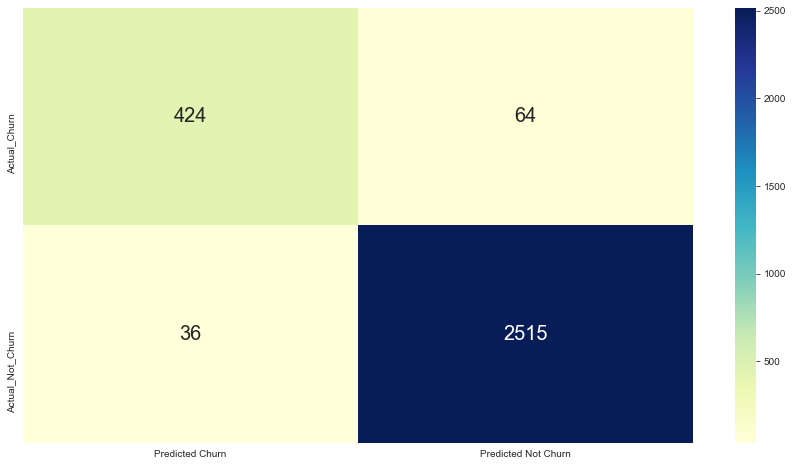

In [70]:
file_name="xgbModel2.pkl"
load_model(file_name,x_test_process_ohc,y_test)

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 2.0002951622009277s
Accuracy score: 0.969
Precision score: 0.980
Recall score: 0.983
F1 score: 0.981
Training Accuracy:  0.9988713318284425
Testing Accuracy:  0.9687397170121751
              precision    recall  f1-score   support

       churn       0.91      0.89      0.90       488
   not churn       0.98      0.98      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

[22:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with t

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


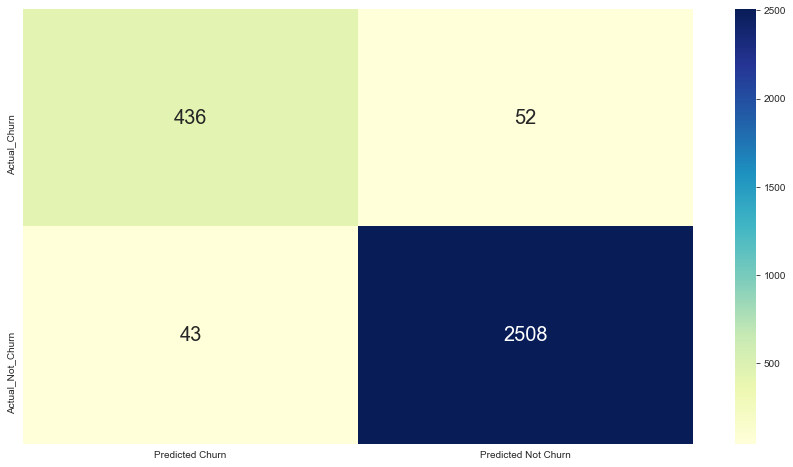

In [71]:
estimators = [('XG', m_xgb),('RFC', RFC)]
VC = VotingClassifier(estimators, voting='hard')
votingModel3 = model_training(VC,x_train_process_ohc,x_test_process_ohc)

In [72]:
file_name = "votingModel3.pkl"
save_model(votingModel3,file_name)


VotingClassifier(estimators=[('XG',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.8, gamma=1,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=5,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
             

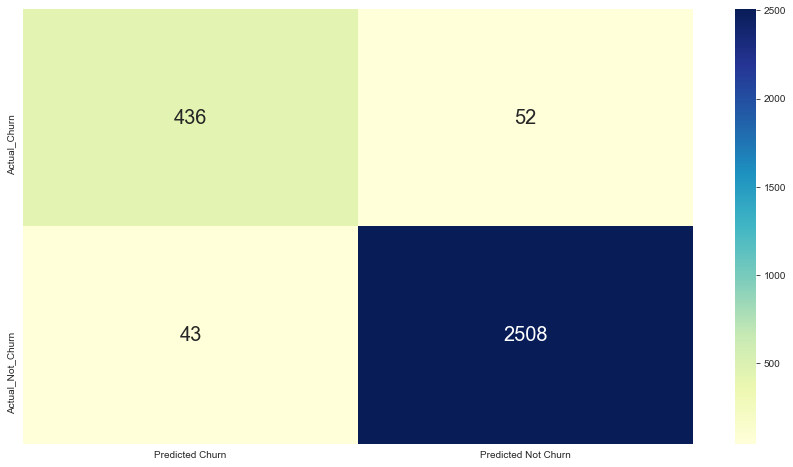

In [73]:
file_name="votingModel3.pkl"
load_model(file_name,x_test_process_ohc,y_test)

In [74]:
CVMean = []
CVSD = []
models = ["RFC","DTC","XGB","RF+XGB"]
tupleModel = [RFC,DTC,m_xgb,VC]
a = 0
for model in models:
    model = cross_val_score(tupleModel[a],x_process_ohc_concat, y_concat,cv=5,scoring='accuracy')
    print(models[a],":",model)
    CVMean.append(model.mean())
    CVSD.append(model.std())
    a+=1

RFC : [0.95853899 0.95459033 0.95802469 0.95802469 0.95851852]
DTC : [0.91609082 0.91707799 0.91654321 0.92444444 0.92197531]
[22:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RF+XGB : [0.9733465  0.96396841 0.96740741 0.96938272 0.96888889]


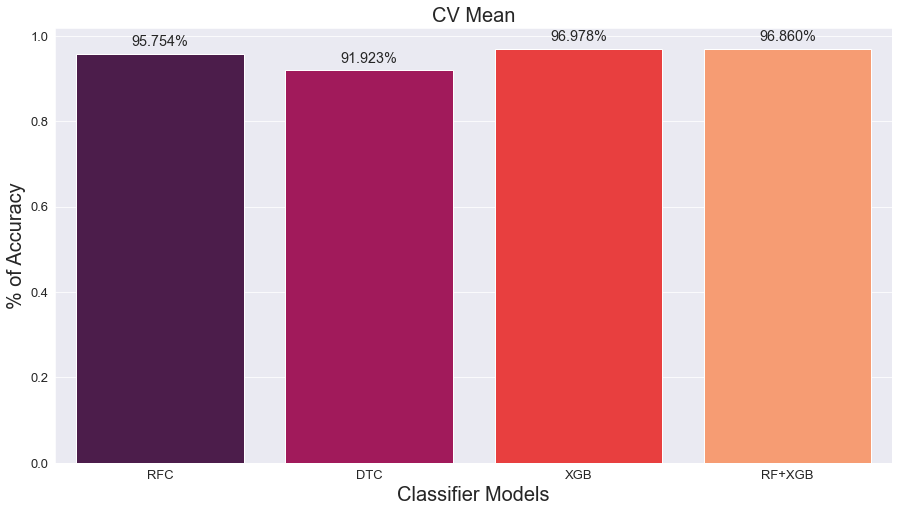

In [75]:
plotEvaluationMetrics(models,CVMean,"CV Mean")

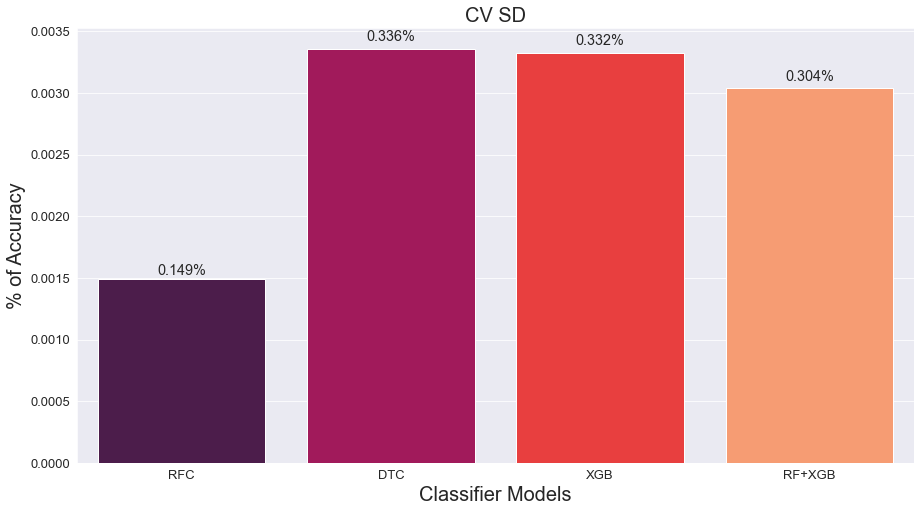

In [76]:
plotEvaluationMetrics(models,CVSD,"CV SD")

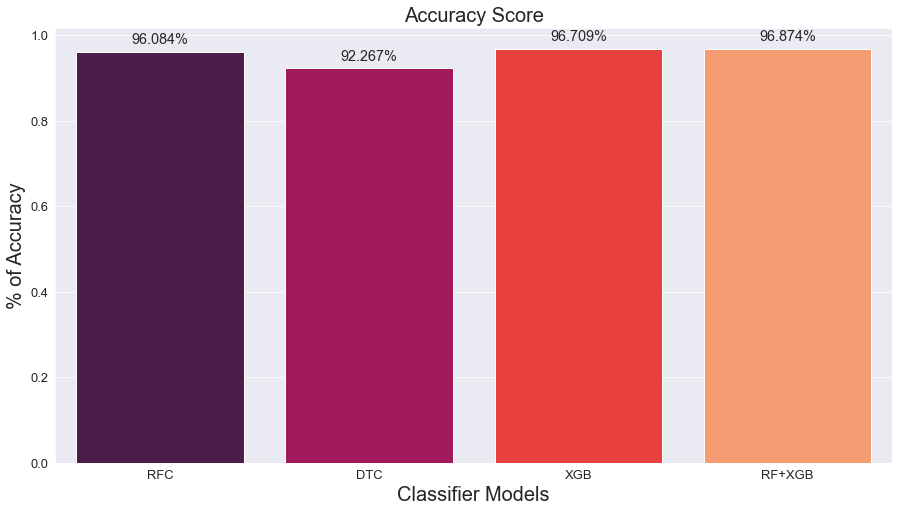

In [77]:
plotEvaluationMetrics(models,acscore,"Accuracy Score")

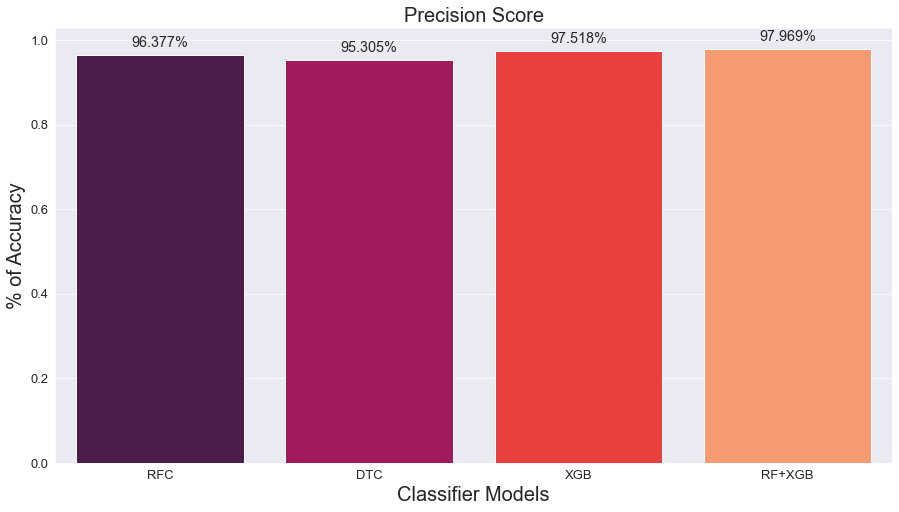

In [78]:
plotEvaluationMetrics(models,acprecision,"Precision Score")

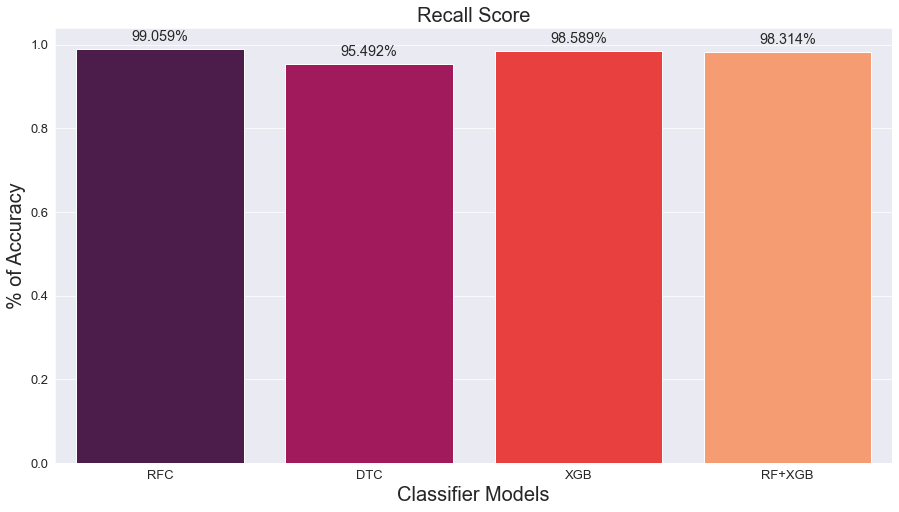

In [79]:
plotEvaluationMetrics(models,acrecall,"Recall Score")

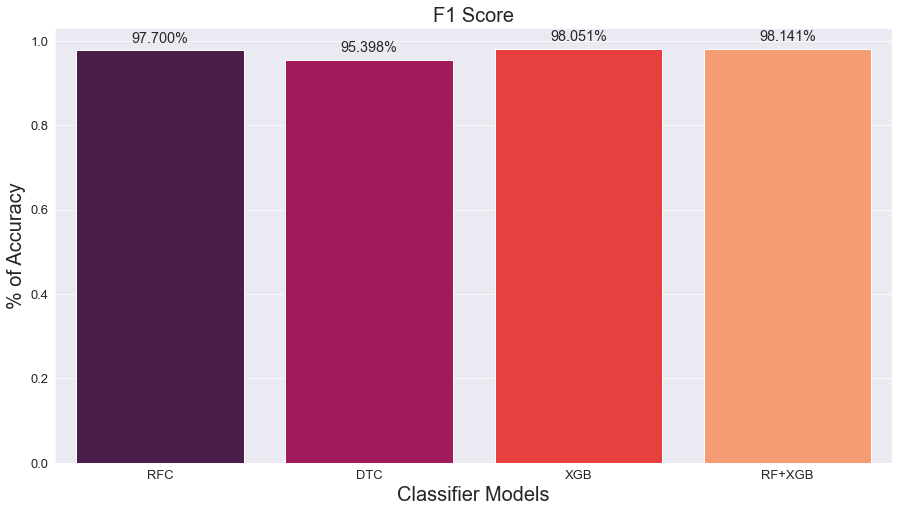

In [80]:
plotEvaluationMetrics(models,acF1,"F1 Score")

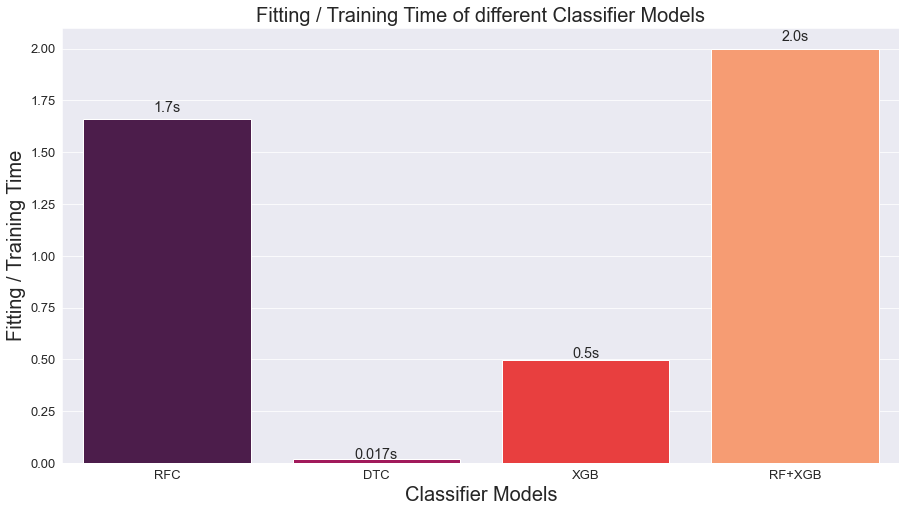

In [81]:
trainingTimePlot(models,acTrainingTime,"Training Time")

## Grid Search Train without One Hot Encoded

## RFC

Training time: 1.190924882888794s
Accuracy score: 0.966
Precision score: 0.971
Recall score: 0.988
F1 score: 0.980
Training Accuracy:  1.0
Testing Accuracy:  0.9657782165185916
              precision    recall  f1-score   support

       churn       0.93      0.85      0.89       488
   not churn       0.97      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.92      0.93      3039
weighted avg       0.97      0.97      0.97      3039



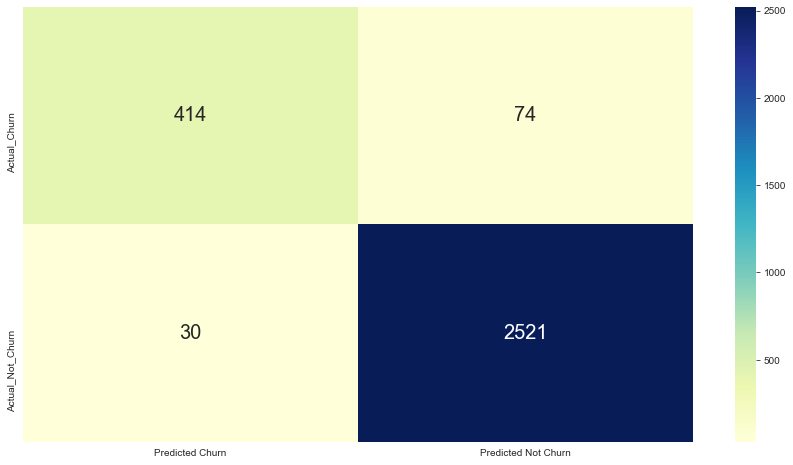

In [82]:
acscore = []
acprecision = []
acrecall = []
acF1 = []
acTrainingTime = []

RFC = RandomForestClassifier(random_state = 0,criterion = 'entropy', max_depth = 25, max_features = 'auto', n_estimators = 150)
model = model_training(RFC,x_train_process,x_test_process)

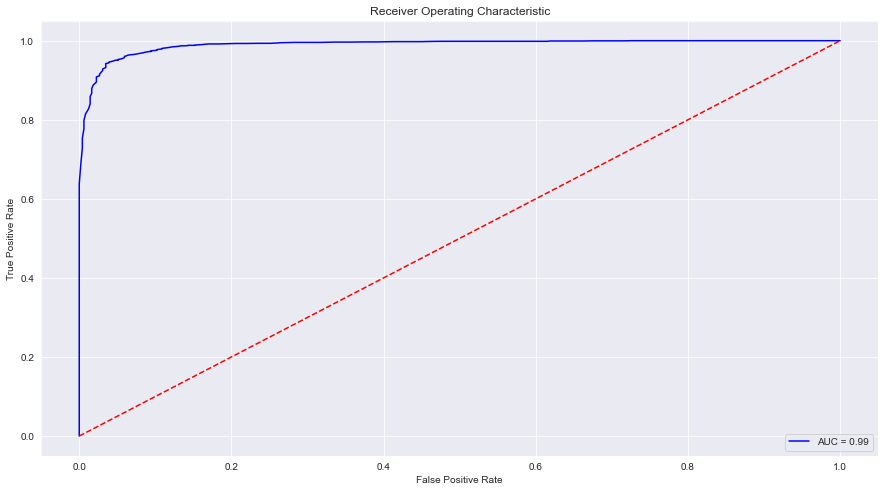

In [83]:
model_roc_curve(RFC,x_train_process,x_test_process)

## DTC

Training time: 0.01394510269165039s
Accuracy score: 0.921
Precision score: 0.949
Recall score: 0.956
F1 score: 0.953
Training Accuracy:  0.9956264108352144
Testing Accuracy:  0.920697597894044
              precision    recall  f1-score   support

       churn       0.76      0.73      0.75       488
   not churn       0.95      0.96      0.95      2551

    accuracy                           0.92      3039
   macro avg       0.86      0.85      0.85      3039
weighted avg       0.92      0.92      0.92      3039



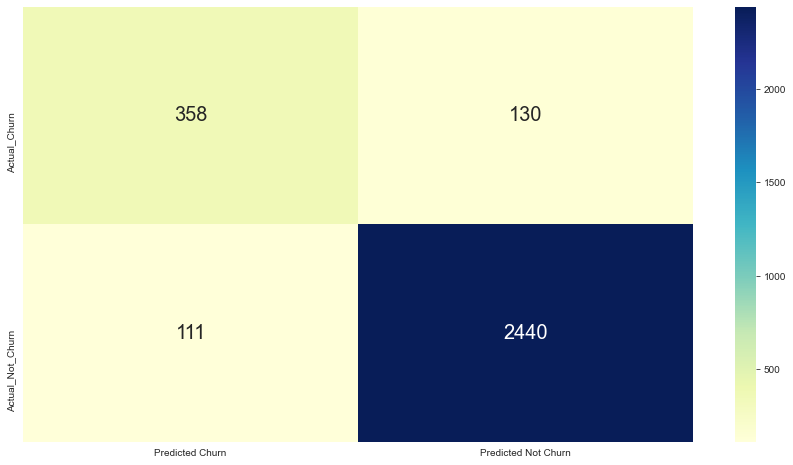

In [84]:
DTC = DecisionTreeClassifier(random_state=0,criterion = 'entropy', max_depth = 15, max_features = 'auto')
model = model_training(DTC,x_train_process,x_test_process)

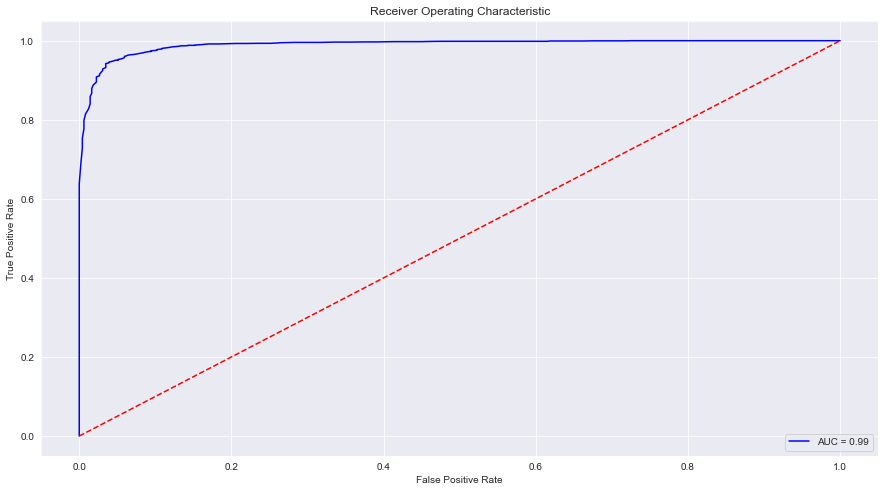

In [85]:
model_roc_curve(RFC,x_train_process,x_test_process)

## XG Boost

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 0.4278552532196045s
Accuracy score: 0.966
Precision score: 0.976
Recall score: 0.985
F1 score: 0.980
Training Accuracy:  0.9968961625282167
Testing Accuracy:  0.9664363277393879
              precision    recall  f1-score   support

       churn       0.92      0.87      0.89       488
   not churn       0.98      0.98      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039

[22:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with t

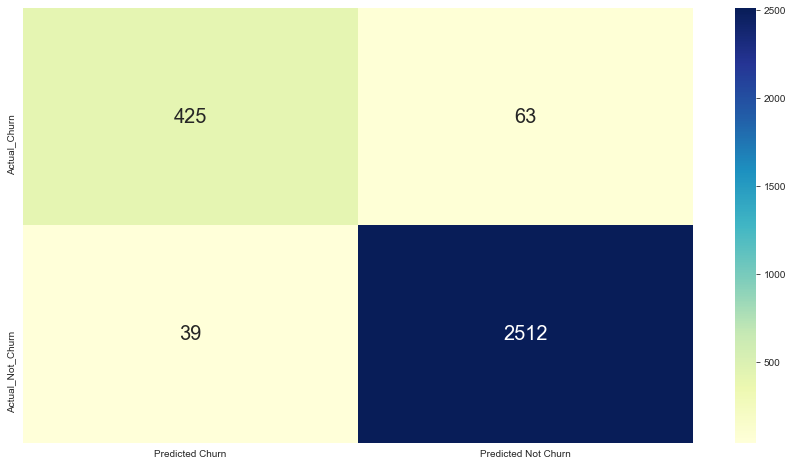

In [86]:
m_xgb = xgb.XGBClassifier(random_state = 0,colsample_bytree = 0.8, gamma = 1, max_depth = 5, min_child_weight= 1, subsample= 1.0)
model = model_training(m_xgb,x_train_process,x_test_process)

[22:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


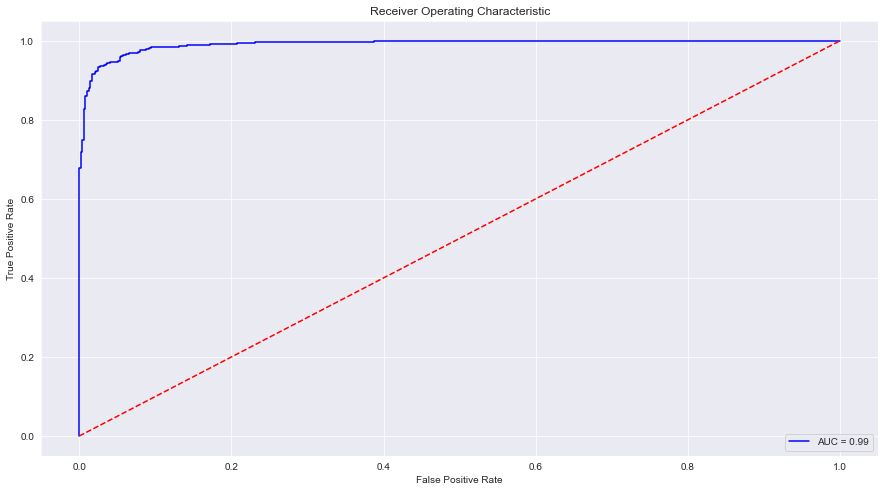

In [87]:
model_roc_curve(m_xgb ,x_train_process,x_test_process)

## Ensemble Model XGBoost + Random Forest

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 1.6558914184570312s
Accuracy score: 0.967
Precision score: 0.980
Recall score: 0.981
F1 score: 0.980
Training Accuracy:  0.9984480812641083
Testing Accuracy:  0.9670944389601843
              precision    recall  f1-score   support

       churn       0.90      0.89      0.90       488
   not churn       0.98      0.98      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

[22:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with t

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


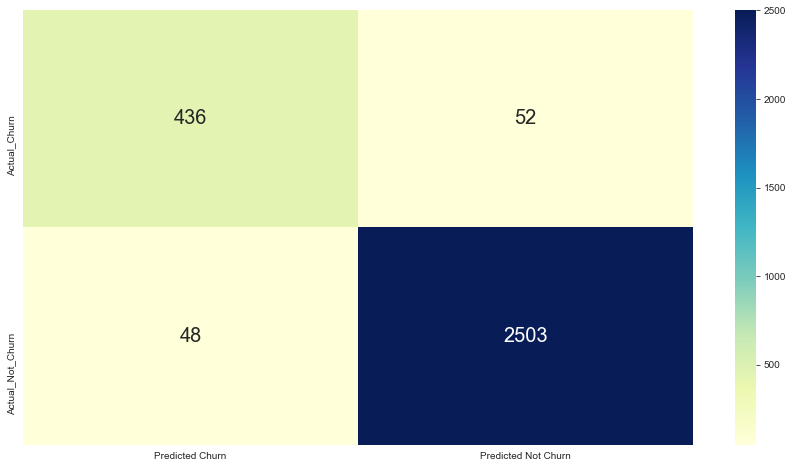

In [88]:
estimators = [('XG', m_xgb),('RFC', RFC)]
VC = VotingClassifier(estimators, voting='hard')
votingModel3 = model_training(VC,x_train_process,x_test_process)

## CV Score

In [89]:
CVMean = []
CVSD = []
models = ["RFC","DTC","XGB","RF+XGB"]
tupleModel = [RFC,DTC,m_xgb,VC]
a = 0
for model in models:
    model = cross_val_score(tupleModel[a],x_process_concat, y_concat,cv=5,scoring='accuracy')
    print(models[a],":",model)
    CVMean.append(model.mean())
    CVSD.append(model.std())
    a+=1

RFC : [0.96939783 0.95952616 0.96197531 0.96296296 0.96592593]
DTC : [0.93336624 0.93534057 0.9254321  0.9362963  0.92938272]
[22:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RF+XGB : [0.976308   0.96544916 0.96790123 0.97185185 0.96938272]


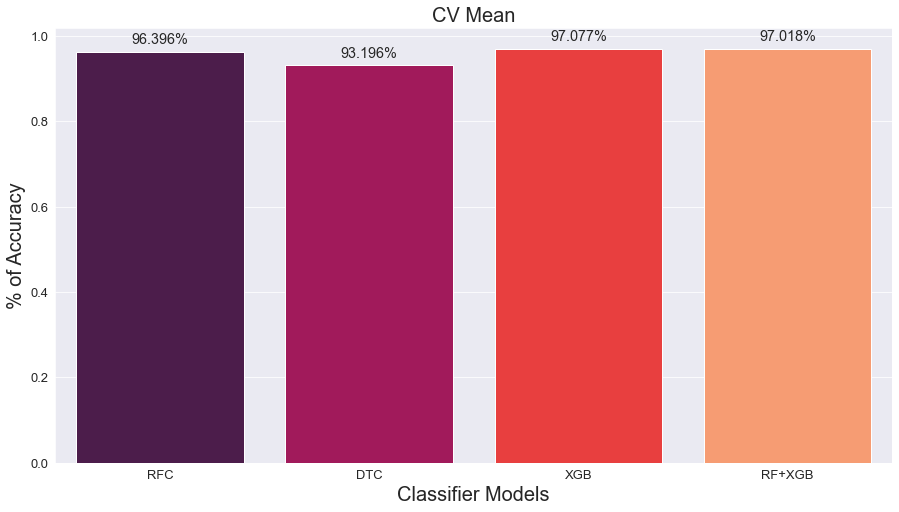

In [90]:
plotEvaluationMetrics(models,CVMean,"CV Mean")

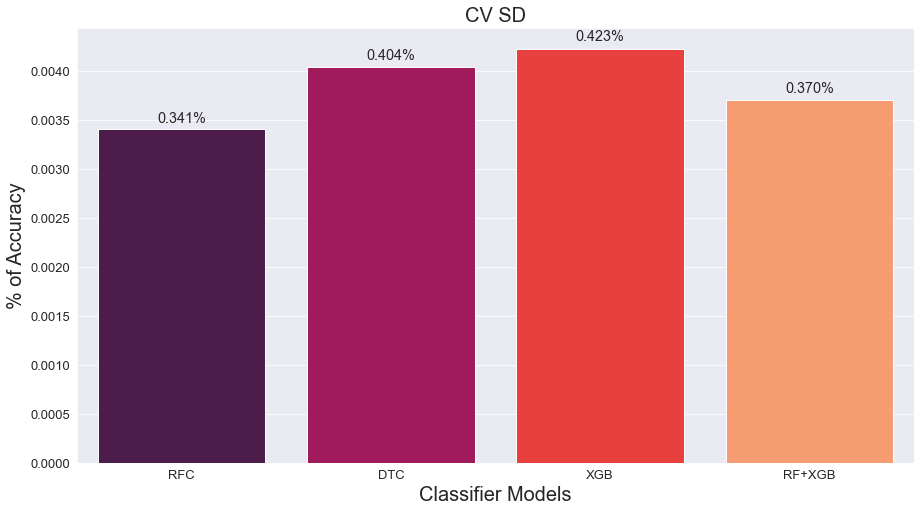

In [91]:
plotEvaluationMetrics(models,CVSD,"CV SD")

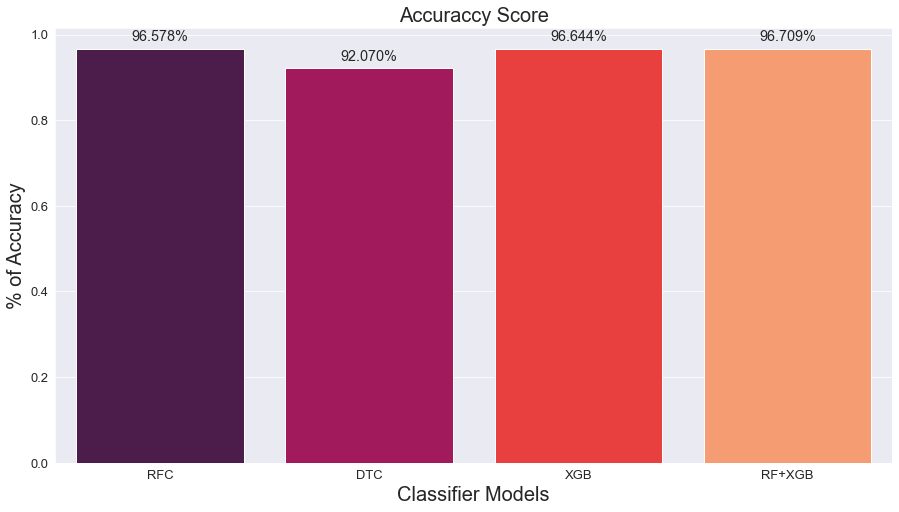

In [92]:

plotEvaluationMetrics(models,acscore,"Accuraccy Score")

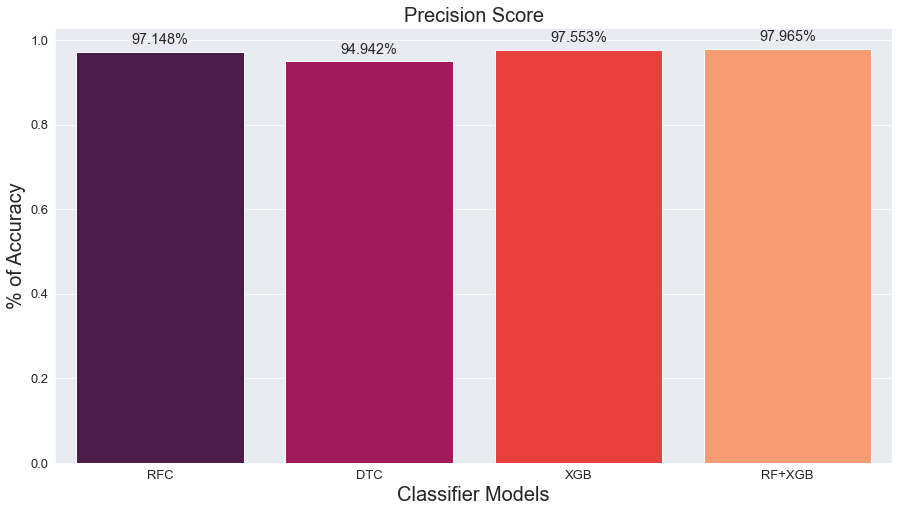

In [93]:
plotEvaluationMetrics(models,acprecision,"Precision Score")

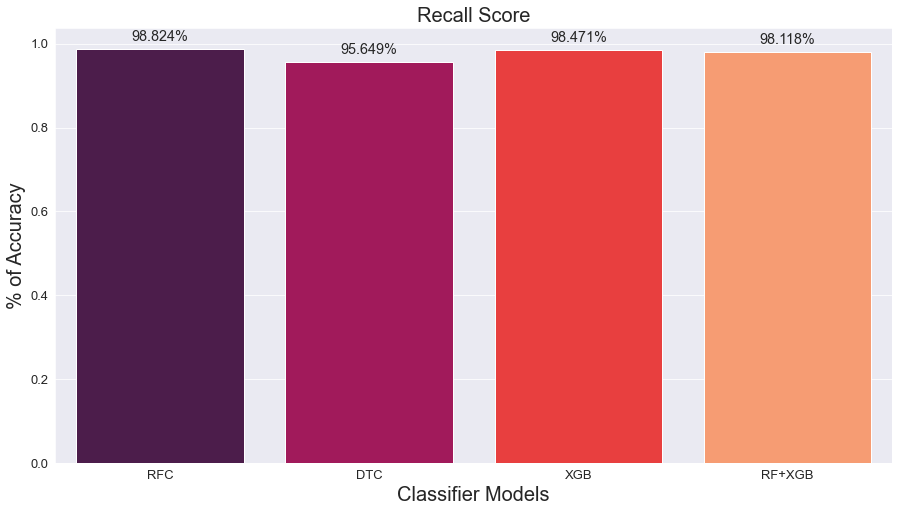

In [94]:
plotEvaluationMetrics(models,acrecall,"Recall Score")

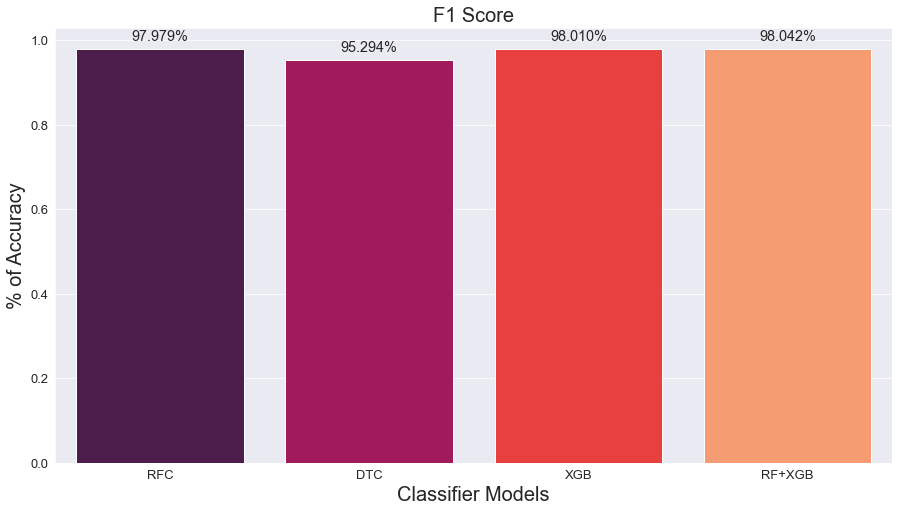

In [95]:
plotEvaluationMetrics(models,acF1,"F1 Score")

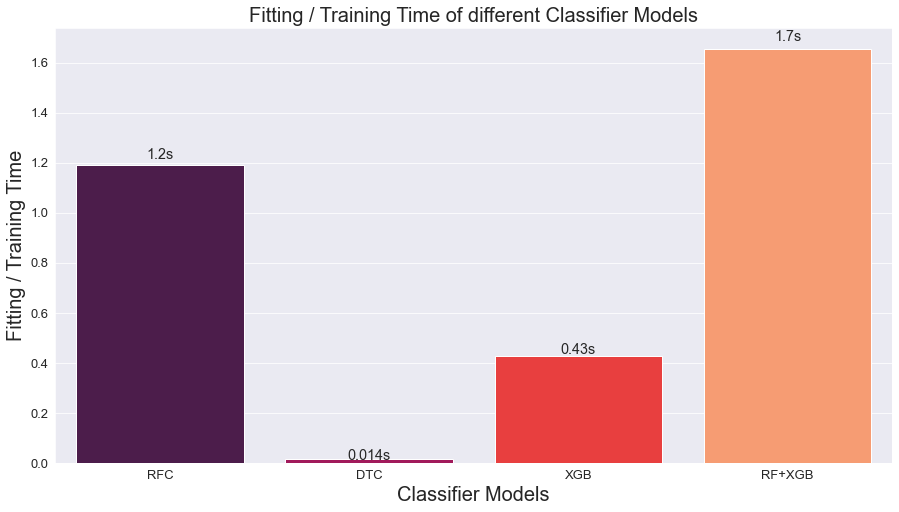

In [96]:
trainingTimePlot(models,acTrainingTime,"Training Time")

## Load Best Models

VotingClassifier(estimators=[('XG',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
               

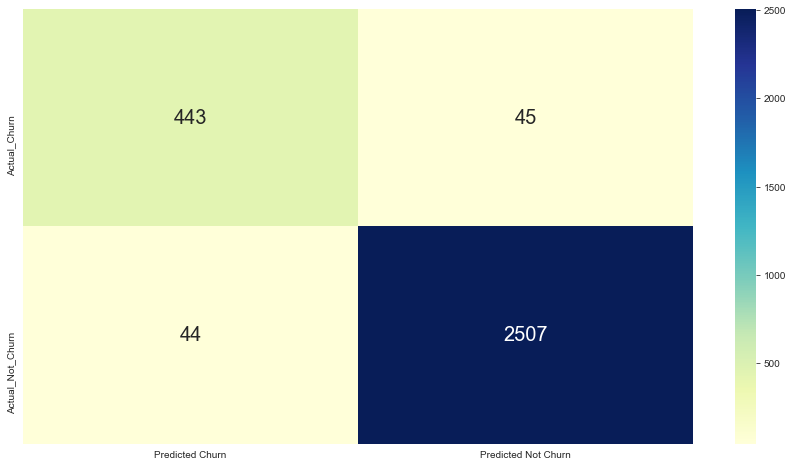

In [97]:
file_name = "votingModel1.pkl"
load_model(file_name,x_test_process,y_test)

VotingClassifier(estimators=[('XG',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
               

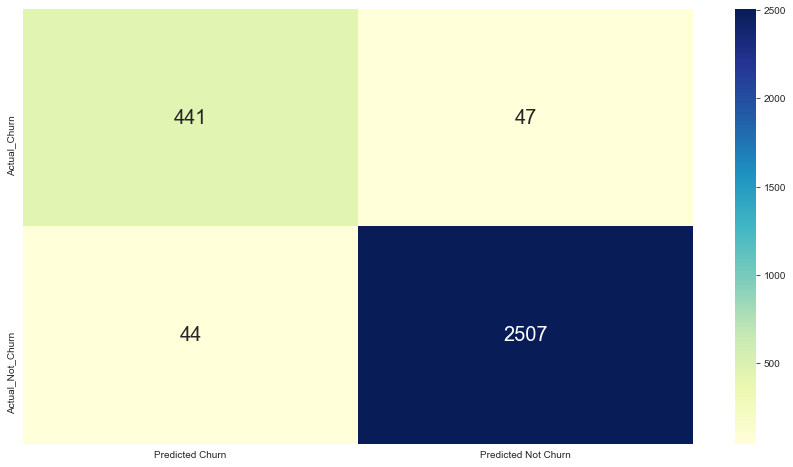

In [98]:
file_name = "votingModel2.pkl"
load_model(file_name,x_test_process_ohc,y_test)

VotingClassifier(estimators=[('XG',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.8, gamma=1,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=5,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
             

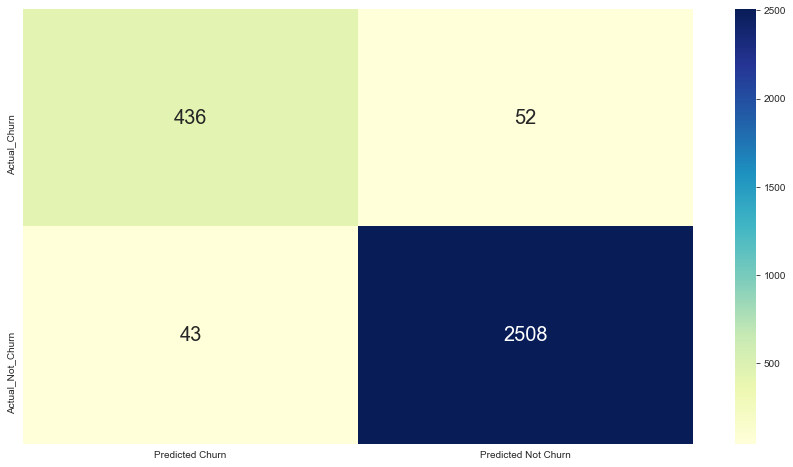

In [99]:
file_name="votingModel3.pkl"
load_model(file_name,x_test_process_ohc,y_test)